## Imports

In [1854]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import os

#from eda import * # A MODIFIER CAR PAS PEP8 ET YA DES TRUCS QUI MARCHENT PAS

from numpy import radians, cos, sin, sqrt
from numpy import arcsin as asin

# Folium
#!pip install folium
import folium
from folium.plugins import HeatMap

# Dates
import datetime as dt
from datetime import timedelta

# KNN imputer
from sklearn.impute import KNNImputer

# Outliers
from sklearn.ensemble import IsolationForest

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

# PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [1855]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [1856]:
# si google colab :
#from google.colab import drive
#drive.mount('/content/drive')

In [1857]:
# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# Load datasets
df_customers = pd.read_csv(os.path.join(path, 'data/olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path, 'data/olist_order_items_dataset.csv'))
df_order_payments = pd.read_csv(os.path.join(path, 'data/olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(os.path.join(path, 'data/olist_order_reviews_dataset.csv'))
df_orders = pd.read_csv(os.path.join(path, 'data/olist_orders_dataset.csv'))
df_products = pd.read_csv(os.path.join(path, 'data/olist_products_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(path, 'data/olist_sellers_dataset.csv'))
df_product_category = pd.read_csv(os.path.join(path, 'data/product_category_name_translation.csv'))

## Exploration de chaque dataset

### 1 - Customers dataset

In [1858]:
# This dataset has information about the customer and its location. Use it to identify unique customers in the
# orders dataset and to find the orders delivery location.

# same customer will get different ids for different orders

In [1859]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [1860]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1861]:
# customer_id -> key to the orders dataset
# customer_unique_id -> unique identifier of a customer
# customer_zip_code_prefix -> 5 digits customer zop code
# customer_city -> customer city name
# customer_state -> customer state

In [1862]:
df_customers['customer_zip_code_prefix'].nunique()

14994

Text(0, 0.5, 'Nombre de clients')

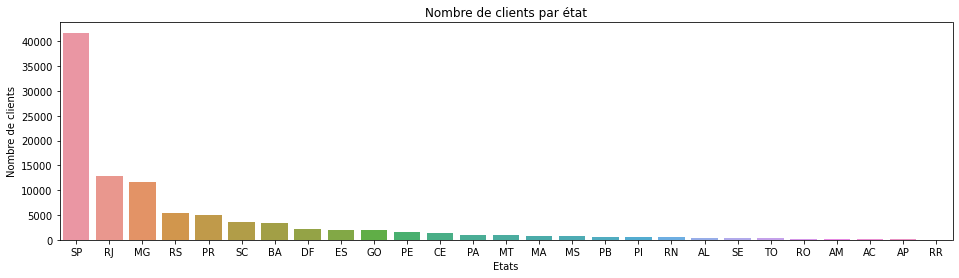

In [1863]:
# Visualisation du nombre de clients par état

plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par état')
sns.barplot(y = df_customers['customer_state'].value_counts(),
            x = df_customers['customer_state'].value_counts().index)
plt.xlabel('Etats')
plt.ylabel('Nombre de clients')

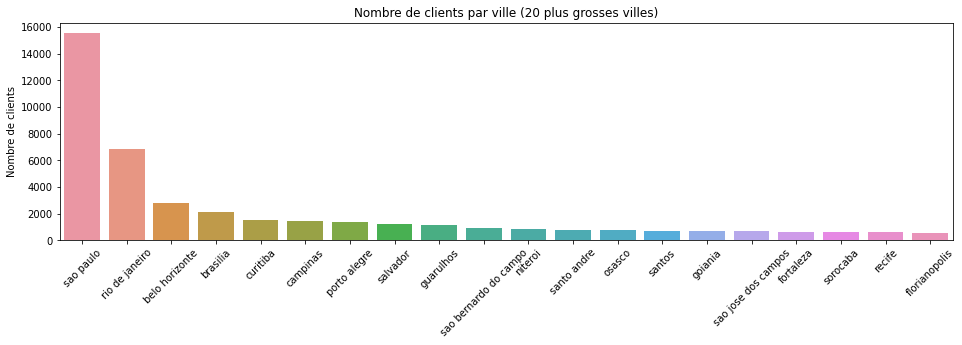

In [1864]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par ville (20 plus grosses villes)')
sns.barplot(x = df_customers['customer_city'].value_counts().index[:20],
            y = df_customers['customer_city'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

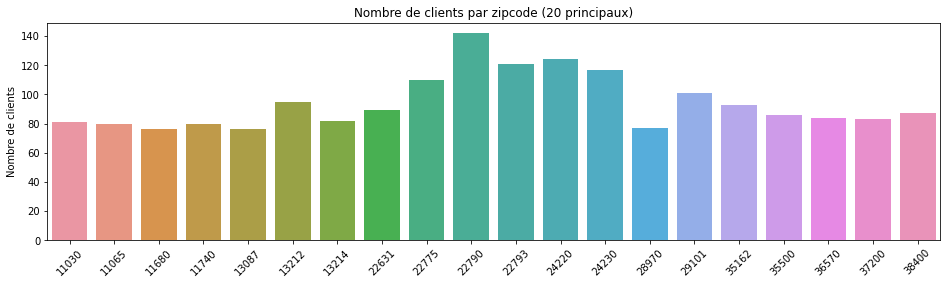

In [1865]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par zipcode (20 principaux)')
sns.barplot(x = df_customers['customer_zip_code_prefix'].value_counts().index[:20],
            y = df_customers['customer_zip_code_prefix'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

In [1866]:
# majorité des clients à SP (São Paulo)

# faire un encodage du type : SP -> 0, les autres villes -> 1 ?

### 2 - Geolocation dataset

In [1867]:
# This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find
# distances between sellers and customers

# -> Données géographiques

In [1868]:
# Aperçu des données
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP


In [1869]:
# -> faire moyenne ou barycentre pour avoir un ensemble de coordonnées par ville/code/etat

In [1870]:
# Structure des données
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [1871]:
########## Visualisation des données - Carte Folium ##########

# Map folium
brazil_coordinates = (-14.2400732, -53.1805017) # coordonnées prises sur wikipedia

# Generating the data that will be given to the heatmap
heat_data = [[row["geolocation_lat"], row["geolocation_lng"]] for index, row in df_geolocation.iterrows()]

# Creating the base map
base_map = folium.Map(location = brazil_coordinates, zoom_start = 2)

# Adding the heatmap layer
HeatMap(data = heat_data, radius = 8, max_zoom = 13).add_to(base_map)

# Displaying the map
# base_map

In [1872]:
# -> attention, quelques outliers - la plupart des points sont au Brésil mais certains sont dans d'autres pays.

In [1873]:
########## OUTLIERS ##########

# -> supprimer outliers pour ne garder que les points situés au Brésil

# Nord (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.27438888] # lat max du Brésil au Nord
# Sud (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.75116944] # lat min du Brésil au Sud

# Ouest (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.98283055] # long max du Brésil à l'Ouest
# Est (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.79314722] # long max du Brésil à l'Est

In [1874]:
# Nombre de régions, villes, codes postaux représenté(e)s dans le jeu de données :
state_unique = df_geolocation['geolocation_state'].nunique()
city_unique = df_geolocation['geolocation_city'].nunique()
zip_unique = df_geolocation['geolocation_zip_code_prefix'].nunique()

print(f'Nombre de régions : {state_unique}')
print(f'Nombre de villes : {city_unique}')
print(f'Nombre de zip code : {zip_unique}')

Nombre de régions : 27
Nombre de villes : 8006
Nombre de zip code : 19010


In [1875]:
# Principaux états :
df_geolocation['geolocation_state'].value_counts()[:5]

SP    404267
MG    126334
RJ    121164
RS     61847
PR     57856
Name: geolocation_state, dtype: int64

<Figure size 432x288 with 0 Axes>

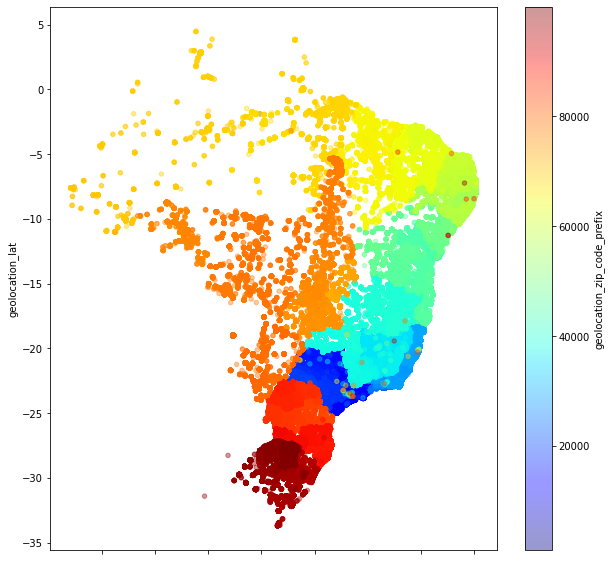

In [1876]:
# Visualisation graphique des données géo (latitudes et longitudes) en fonction du code postal associé :

plt.figure()
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    c = 'geolocation_zip_code_prefix',
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (10, 10))
plt.show()

In [1877]:
# quelques points qui ont le mauvais zipcode par rapport aux coordonnées...
# to do -> essayer de les supprimée ? ou des les rectifier ?

# encore quelques points un peu éloignés au Nord -> vérifier coordonnées du Brésil
# - update -> c'est bon, les points au Nord sont bien situés au Brésil - état du Nord semble donc moins réprésenté dans les données

In [1878]:
########## DUPLICATS ##########

# nombre de duplicats dans le jeu de données
print(f'Nombre de duplicats dans le jeu de données geolocation avant processing: {df_geolocation.duplicated().sum()}')

# supprimer duplicats
print('****** Suppression des duplicats en cours ******')
df_geolocation = df_geolocation.drop_duplicates()

# nombre de duplicats dans le jeu de données après processing
print(f'Nombre de duplicats dans le jeu de données geolocation après processing: {df_geolocation.duplicated().sum()}')

Nombre de duplicats dans le jeu de données geolocation avant processing: 261822
****** Suppression des duplicats en cours ******
Nombre de duplicats dans le jeu de données geolocation après processing: 0


In [1879]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.18066,-52.03437,agua santa,RS
1000156,99950,-28.07219,-52.01127,tapejara,RS
1000157,99950,-28.06886,-52.01296,tapejara,RS
1000158,99950,-28.06864,-52.01071,tapejara,RS


In [1880]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'agua santa']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999754,99965,-28.17389,-52.03845,agua santa,RS
999755,99965,-28.17843,-52.03526,agua santa,RS
999933,99965,-28.21084,-52.05993,agua santa,RS
999949,99965,-28.18171,-52.03559,agua santa,RS
1000067,99965,-28.17470,-52.03551,agua santa,RS
1000155,99965,-28.18066,-52.03437,agua santa,RS


In [1881]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'sao paulo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
207050,8450,-23.54767,-46.39002,sao paulo,SP
207052,8450,-23.54707,-46.39109,sao paulo,SP
207053,8473,-23.57269,-46.39424,sao paulo,SP
207054,8411,-23.55594,-46.41391,sao paulo,SP


In [1882]:
# plusieurs zip code par ville, mais une seule ville par zipcode

In [1883]:
# attention -> plusieurs orthographes pour les villes
df_geolocation['geolocation_city'].value_counts()

sao paulo            79927
rio de janeiro       35177
são paulo            19718
belo horizonte       19474
curitiba             11263
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
vertente do lerio        1
araçagi                  1
Name: geolocation_city, Length: 8006, dtype: int64

In [1884]:
# exemple: sao paulo & são paulo
# supprimer les accents pour être tranquille :

df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_geolocation['geolocation_city'].value_counts()

sao paulo         99646
rio de janeiro    35177
belo horizonte    19474
curitiba          11263
brasilia           8791
                  ...  
paqueta               1
tabai                 1
martinesia            1
tapuirama             1
silvano               1
Name: geolocation_city, Length: 5964, dtype: int64

In [1885]:
# regarder nombre de zip code par ville et nb de villes par états (genre de heatmap avec cercles)

# MOCHE - A REFAIRE et surtout très long
"""
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    s = df_geolocation['geolocation_zip_code_prefix'],
                    label = 'geolocation_zip_code_prefix',
                    #c = df_geolocation['geolocation_city'],
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (12, 8))
plt.show()"""

"\ndf_geolocation.plot(kind = 'scatter',\n                    x = 'geolocation_lng',\n                    y = 'geolocation_lat',\n                    alpha = 0.4,\n                    s = df_geolocation['geolocation_zip_code_prefix'],\n                    label = 'geolocation_zip_code_prefix',\n                    #c = df_geolocation['geolocation_city'],\n                    cmap = plt.get_cmap('jet'),\n                    colorbar = True,\n                    figsize = (12, 8))\nplt.show()"

In [1886]:
# Granularité du jeu de données : state > city > zip code

In [1887]:
df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
14,1037,-23.54519,-46.63786,sao paulo,SP
31,1037,-23.54670,-46.64034,sao paulo,SP
169,1037,-23.54388,-46.63807,sao paulo,SP
178,1037,-23.54616,-46.63989,sao paulo,SP
236,1037,-23.54388,-46.63807,sao paulo,SP
283,1037,-23.54520,-46.63792,sao paulo,SP
417,1037,-23.54519,-46.63786,sao paulo,SP
420,1037,-23.54672,-46.64028,sao paulo,SP
433,1037,-23.54646,-46.64015,sao paulo,SP


In [1888]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -23.54562
14     -23.54519
31     -23.54670
169    -23.54388
178    -23.54616
236    -23.54388
283    -23.54520
417    -23.54519
420    -23.54672
433    -23.54646
533    -23.54581
677    -23.54587
700    -23.54434
724    -23.54314
781    -23.54314
874    -23.54493
956    -23.54609
1017   -23.54670
1216   -23.54634
Name: geolocation_lat, dtype: float64

In [1889]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-23.54533514931352

In [1890]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -46.63929
14     -46.63786
31     -46.64034
169    -46.63807
178    -46.63989
236    -46.63807
283    -46.63792
417    -46.63786
420    -46.64028
433    -46.64015
533    -46.63960
677    -46.63969
700    -46.63835
724    -46.63761
781    -46.63761
874    -46.63829
956    -46.63976
1017   -46.64034
1216   -46.63996
Name: geolocation_lng, dtype: float64

In [1891]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-46.63899521271492

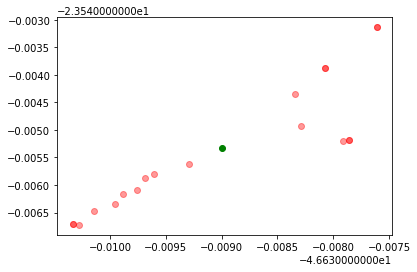

In [1892]:
# test en remplaçant coordonnées par moyenne
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

# Visualisation graphique des zip_code_prefix, des latitudes et longitudes associées
plt.figure()
plt.scatter(x = x_zip, y = y_zip, alpha = 0.4, c = 'red') # points
plt.scatter(x = x_zip.mean(), y = y_zip.mean(), c = 'green') # moyenne
plt.show()

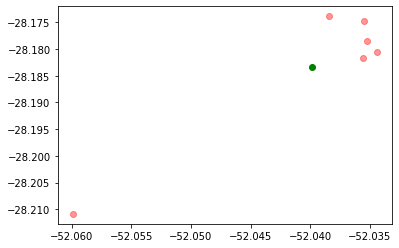

In [1893]:
# test avec un autre zip code
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]

plt.figure()
plt.scatter(x = x_zip,
            y = y_zip,
            alpha = 0.4,
            c = 'red')
plt.scatter(x = x_zip.mean(),
            y = y_zip.mean(),
            c = 'green')
plt.show()

In [1894]:
# impossible de merger geoloc aux autres df (sellers et customers) car plusieurs coordonnées par zip code/villes...
# pas la même granularité entre les df donc besoin de merger

In [1895]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [1896]:
# groupby et remplacer par mean
df_geo = df_geolocation.groupby(['geolocation_zip_code_prefix'], as_index = False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state' :'first'
})

<Figure size 432x288 with 0 Axes>

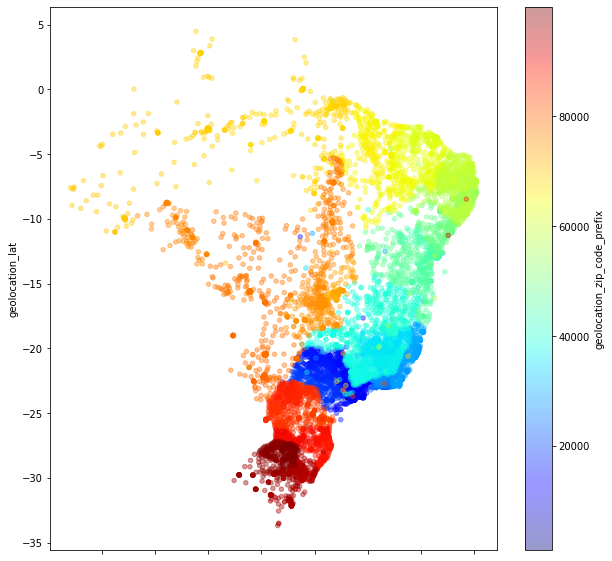

In [1897]:
plt.figure()
df_geo.plot(kind = 'scatter',
            x = 'geolocation_lng',
            y = 'geolocation_lat',
            alpha = 0.4,
            c = 'geolocation_zip_code_prefix',
            cmap = plt.get_cmap('jet'),
            colorbar = True,
            figsize = (10, 10))
plt.show()

### 3 - Order items dataset

In [1898]:
# This dataset includes data about the items purchased within each order.

df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [1899]:
# order_id -> order unique id
# order_item_id -> nb of items by order
# product_id -> product unique id
# seller_id -> seller unique id
# shipping_limit_date -> shipping limit date (for the seller)
# price -> item price
# freight_value -> item freight value (si plusieurs items par commande, freight value splitté entre les items)

In [1900]:
df_order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

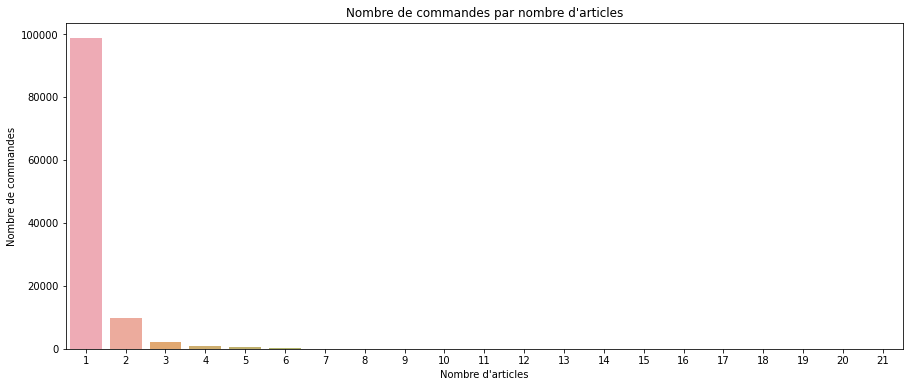

In [1901]:
# Nombre d'articles par commande
plt.figure(figsize = (15, 6))
sns.barplot(y = df_order_items['order_item_id'].value_counts(),
            x = df_order_items['order_item_id'].value_counts().index,
            alpha = 0.8)
plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
plt.show()

In [1902]:
# la plupart des commandes -> 1 seul article

### 4 - Order payments dataset

In [1903]:
# This dataset includes data about the orders payment options

# Aperçu des données
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1904]:
# order_id -> unique ID of an order
# payment_sequential -> nb de méthodes de paiement
# payment_type -> méthode de paiement
# payment_installments -> nb of installments chosen by the customer (paiement en plusieurs fois)
# payment_value -> transaction value

In [1905]:
df_order_payments['payment_sequential'].value_counts()[:5]

1    99360
2     3039
3      581
4      278
5      170
Name: payment_sequential, dtype: int64

In [1906]:
# La majorité des paiements se fait en une fois

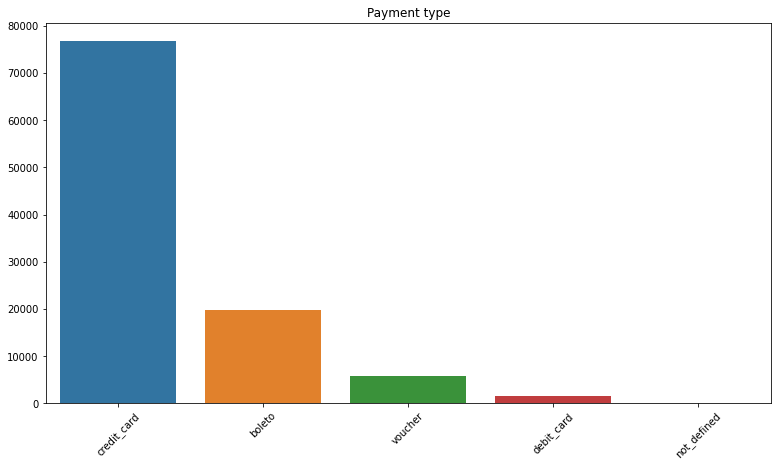

In [1907]:
# Type de paiement
order_status = df_order_payments['payment_type'].value_counts()

plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Payment type')
plt.xticks(rotation = 45)
plt.show()

In [1908]:
# 5 types de paiement différents
# Boleto = moyen de payment en espèce

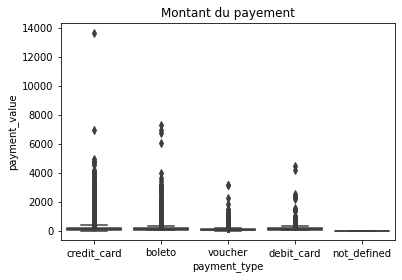

In [1909]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type')
plt.title('Montant du payement')
plt.show()

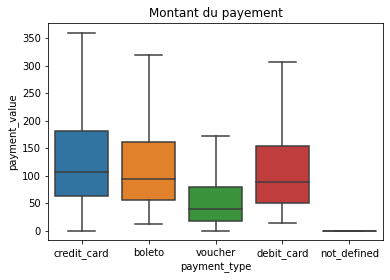

In [1910]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type',
            showfliers = False) # pour enlever les outliers 
plt.title('Montant du payement')
plt.show()

In [1911]:
# 'Not defined' -> 3 lignes

display(df_order_payments.loc[df_order_payments['payment_type'] == 'not_defined'])

# à dropper pour simplifier et nettoyer un peu les données
df_order_payments = df_order_payments.loc[df_order_payments['payment_type'] != 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


### 5 - Order reviews dataset

In [1912]:
# This dataset includes data about the reviews made by the customers

# Aperçu des données
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1913]:
# review_id -> unique review id
# order_id -> unique order id
# review_score -> de 1 à 5
# review_comment_title -> titre du commentaire (en portugais)
# review_comment_message -> commentaire (en portugais)
# review_creation_date -> date à laquelle le questionnaire de satisfaction a été envoyé au client
# review_answer_timestamp -> date de complétion du questionnaire de satisfaction par le client

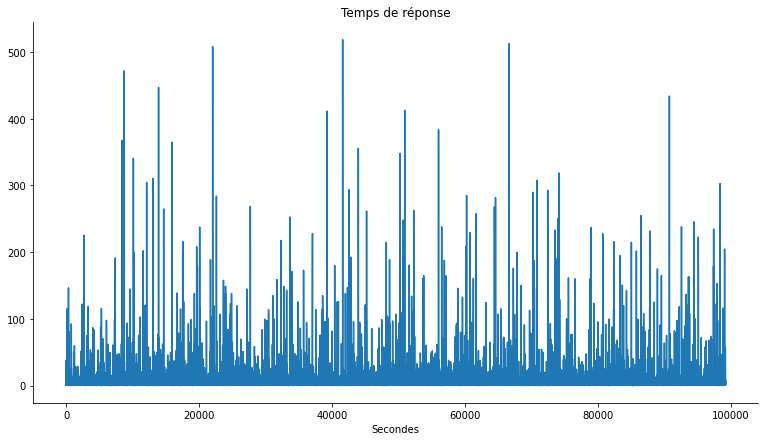

In [1914]:
# délai d'évaluation des produits

delay_reponse = (pd.to_datetime(df_order_reviews['review_answer_timestamp']) - pd.to_datetime(df_order_reviews['review_creation_date'])).dt.total_seconds()/(3600*24)
delay_reponse

# Histogramme du délai d'évaluation des produits

plt.figure(figsize = (13, 7))
sns.lineplot(data = delay_reponse) # TO DO -> MOCHE, A ARRANGER
plt.xlabel('Secondes')
plt.title('Temps de réponse')
sns.despine()
plt.show()

In [1915]:
# quelques commentaires manquants -> faire variable bool (commentaire présent/absent)
# (cf. section feature engineering plus bas)

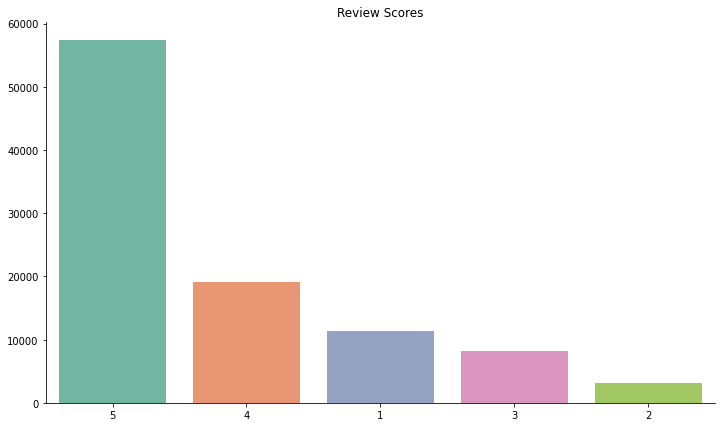

In [1916]:
# Distribution des scores de reviews
plt.figure(figsize = (12, 7))
review_score_index = [str(i) for i in df_order_reviews['review_score'].value_counts().index]
sns.barplot(x = review_score_index, y = df_order_reviews['review_score'].value_counts().values, palette = 'Set2')
plt.title('Review Scores')
sns.despine() # Remove the top and right spines from plot(s)
plt.show()

### 6 - Orders dataset

In [1917]:
# "Core" dataset

# Aperçu des données
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7776,86c0e519ffee48220503670fac236e1b,39bd0c72a4f0228e5add65a911458495,delivered,2017-03-22 17:40:51,2017-03-24 02:44:09,2017-03-29 17:24:54,2017-04-04 15:41:38,2017-04-25 00:00:00
39678,879877b4935ac3de514fe50c6a27d1f4,1f7a3529bb85665445a4a474cdc9159b,delivered,2017-09-19 15:38:11,2017-09-21 02:55:38,2017-09-26 16:41:48,2017-09-30 16:21:22,2017-10-05 00:00:00
49439,290d9d5867e1032867562e8553bbed4b,5820f27d2f97a96c7c57219ef1adc5e6,delivered,2018-04-06 22:08:56,2018-04-06 22:29:07,2018-04-11 18:28:31,2018-04-27 18:34:47,2018-05-14 00:00:00
47297,e932edaa6417ab9aba25187f8e6433dd,dc93c2d3500469cda3d96ca2e50f5142,delivered,2018-08-03 13:23:00,2018-08-04 04:24:02,2018-08-06 12:43:00,2018-08-10 22:55:28,2018-08-20 00:00:00
93654,b3f7f632c85da6b71020c45771e67c5e,42d4a2e8a460728da550948367a9f2d9,delivered,2018-03-06 12:39:48,2018-03-09 06:55:25,2018-03-09 20:58:29,2018-04-16 11:21:19,2018-03-28 00:00:00


In [1918]:
# order_id -> unique id of the order
# customer_id -> key to the customer dataset
# order_status -> status de la commande
# order_purchase_timestamp -> date d'achat
# order_approved_at -> date d'acceptation du paiment
# order_delivered_carrier_date -> date à laquelle la commande confiée au service de livraison
# order_delivered_customer_date -> date de livraison
# order_estimated_delivery_date -> date de livraison estimée indiquée au client lors de l'achat

In [1919]:
# idée -> regarder delta entre date de livraison estimée et effective - regarder correlation avec note review

In [1920]:
# manque quelques dates - regarder où

df_orders.loc[df_orders['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [1921]:
# to do -> voir s'il y a un lien entre ces commandes

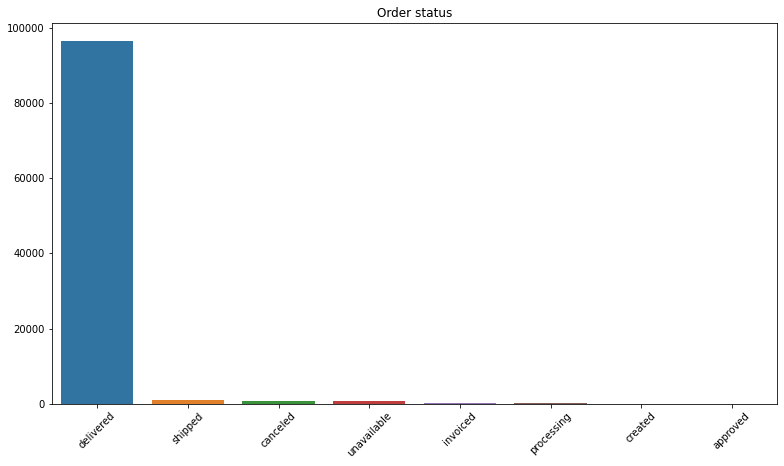

In [1922]:
# Nombre de commandes par statuts d'achats
order_status = df_orders['order_status'].value_counts()

# Barplot
plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Order status')
plt.xticks(rotation = 45)
plt.show()

In [1923]:
# Suppression des commandes 'canceled' ? ou les concerver ?
df_orders = df_orders[df_orders['order_status'] != 'canceled']

# enlever aussi commandes 'created' ?
# autre idée -> ne garder que les commandes livrées ?

### 7 - Products dataset

In [1924]:
# This dataset includes data about the products sold by Olist

# Aperçu des données
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5529,66d92b0c49af34728904a73c26e9e59a,relogios_presentes,56.0,582.0,1.0,450.0,16.0,19.0,14.0
16232,9da581af1760052f6c62b922a1793337,brinquedos,33.0,646.0,1.0,500.0,35.0,20.0,30.0
6767,50f39d42ee3c1155a39f330b0b53c735,NaN,NaN,NaN,NaN,500.0,16.0,19.0,12.0
31293,49ef750dc5bf23e3788d4f614bc6dbe9,cama_mesa_banho,53.0,292.0,1.0,2174.0,46.0,14.0,34.0
28966,f9982e3da18bb4f67e0fa0fcca27b8d4,consoles_games,45.0,1338.0,1.0,600.0,18.0,12.0,18.0


In [1925]:
# product_id
# product_category_name (en portugais)
# product_name_lenght
# product_description_lenght
# product_photos_qty
# product_weight_g
# product_length_cm
# product_height_cm
# product_width_cm

In [1926]:
# combien de catégories de produits ?
df_products['product_category_name'].value_counts() # -> 73 catégories de produits

cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
papelaria                                          849
fashion_bolsas_e_acessorios                        849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                        517
construcao

### 8 - Sellers dataset

In [1927]:
# This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller
# location and to identify which seller fulfilled each product

# Aperçu des données
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1928]:
# seller_id
# seller_zip_code_prefix
# seller_city
# seller_state

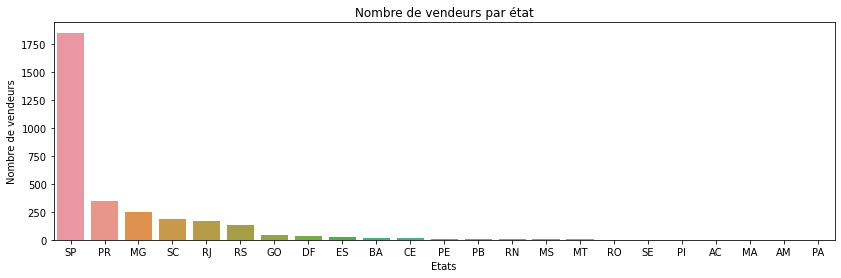

In [1929]:
# Visualisation du nombre de vendeurs dans les différents états
plt.figure(figsize = (14, 4))
sns.barplot(y = df_sellers['seller_state'].value_counts(),
            x = df_sellers['seller_state'].value_counts().index)
plt.title('Nombre de vendeurs par état')
plt.xlabel('Etats')
plt.ylabel('Nombre de vendeurs')
plt.show()

In [1930]:
# grande majorité des vendeurs sont à SP (São Paulo)

### 9 - Product category name translation

In [1931]:
# Translates the product_category_name to english

# Aperçu des données
df_product_category.sample(5)

,product_category_name,product_category_name_english
24,climatizacao,air_conditioning
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture
46,artes,art
64,cds_dvds_musicais,cds_dvds_musicals


In [1932]:
# Données manquantes
df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Liens entre datasets

## Merge

In [1933]:
# utiliser le dataset orders et merger les autres datasets dessus # NON
# utiliser le dataset customers et merger dessus -> on veut aggreger les données par client

# Datasets :
#df_customers
#df_geolocation
#df_order_items
#df_order_payments
#df_order_reviews
#df_orders
#df_products
#df_sellers
#df_product_category

In [1934]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1935]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1936]:
# 1 - merge sellers avec coordonnées geo

# renommer colonnes df sellers pour faciliter merge
df_sellers.columns = ['seller_id', 'geolocation_zip_code_prefix', 'seller_city', 'seller_state']

# merge
df_sellers_geo = pd.merge(df_sellers,
                          df_geo,
                          how = 'left',
                          on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_sellers_geo.drop(columns = ['geolocation_zip_code_prefix',
                               'geolocation_city',
                               'geolocation_state'
                              ], inplace = True)

# renommer colonnes
df_sellers_geo.columns = ['seller_id', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng']

df_sellers_geo.sample(5)

,seller_id,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
1742,7fc87cc3e89b3d1d5cabdca32f8485aa,guarulhos,SP,-23.44480,-46.52534
1241,b5e3e38609125694d2ea2417522a60b7,florianopolis,SC,-27.59351,-48.54417
2661,974cf2cb8f4b7add98709c30df02fe10,araraquara,SP,-21.77221,-48.18072
120,44073f8b7e41514de3b7815dd0237f4f,brasilia,DF,-15.83375,-47.94715
2607,b586cd24c010a13916af621b0325fbba,rio do sul,SC,-27.22381,-49.66019


In [1937]:
# 2 - merge sellers avec order items

nb_sellers = df_sellers_geo['seller_id'].nunique()
print(f'Nombre de sellers avant merge : {nb_sellers}')

nb_sellers_items = df_order_items['seller_id'].nunique()
print(f'Nombre de sellers dans items avant merge : {nb_sellers_items}')

nb_order_items = df_order_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order_items}')

sellers_and_items = pd.merge(df_order_items,
                             df_sellers_geo,
                             how = 'left',
                             left_on = ['seller_id'],
                             right_on = ['seller_id'])

nb_sellers_final = sellers_and_items['seller_id'].nunique()
print(f'Nombre de sellers après merge : {nb_sellers_final}')
print(f'{nb_sellers - nb_sellers_final} sellers perdus pendant le merge.')
print(f'{nb_sellers_items - nb_sellers_final} sellers items perdus pendant le merge.')

nb_order_final = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order_items - nb_order_final} order perdus pendant le merge.')

sellers_and_items

Nombre de sellers avant merge : 3095
Nombre de sellers dans items avant merge : 3095
Nombre de commandes dans items avant merge : 98666
Nombre de sellers après merge : 3095
0 sellers perdus pendant le merge.
0 sellers items perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555


In [1938]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [1939]:
# 3 - ajouter infos produits
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_and_items['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_produits_df = df_products['product_id'].nunique()
print(f'Nombre de produits dans df produit avant merge : {nb_produits_df}')

nb_order = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

sellers_items_products = pd.merge(sellers_and_items,
                                  df_products,
                                  how = 'left',
                                  left_on = ['product_id'],
                                  right_on = ['product_id'])

nb_produits_final = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')
print(f'{nb_produits_df - nb_produits_final} infos produits perdus pendant le merge.')

nb_order_final = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')

sellers_items_products

Nombre de produits dans order items avant merge : 32951
Nombre de produits dans df produit avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de produits après merge : 32951
0 produits perdus pendant le merge.
0 infos produits perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [1940]:
# 4 - ajouter infos produits aux commandes
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_order = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

nb_order_df = df_orders['order_id'].nunique()
print(f'Nombre de commandes avant merge : {nb_order_df}')

products_orders = pd.merge(df_orders,
                           sellers_items_products,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_produits_final = products_orders['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')

nb_order_final = products_orders['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order items perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order perdus pendant le merge.')

products_orders

Nombre de produits dans order items avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de commandes avant merge : 98816
Nombre de produits après merge : 32735
216 produits perdus pendant le merge.
Nombre de commandes après merge : 98816
-150 order items perdus pendant le merge.
0 order perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,belo horizonte,MG,-19.83687,-43.92324,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,mogi das cruzes,SP,-23.54153,-46.26215,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112714,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112715,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112716,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112717,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [1941]:
# 5 - ajouter infos payment aux commandes
# merge précédent (products_orders) + df_order_payments

nb_order = products_orders['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_payments['order_id'].nunique()
print(f'Nombre de payments commandes avant merge : {nb_order_df}')

products_orders_payment = pd.merge(products_orders,
                           df_order_payments,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order payments perdus pendant le merge.')

products_orders_payment

Nombre de commandes dans order avant merge : 98816
Nombre de payments commandes avant merge : 99437
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
621 order payments perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117684,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00
117685,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,credit_card,5.0,271.01
117686,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
117687,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c

In [1942]:
# 6 - ajouter infos reviews aux commandes
# merge précédent (products_orders_payment) + df_order_reviews

nb_order = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_reviews['order_id'].nunique()
print(f'Nombre de reviews commandes avant merge : {nb_order_df}')

products_orders_payment_reviews = pd.merge(products_orders_payment,
                           df_order_reviews,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order reviews perdus pendant le merge.')

products_orders_payment_reviews

Nombre de commandes dans order avant merge : 98816
Nombre de reviews commandes avant merge : 98673
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
-143 order reviews perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
118389,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:2

In [1943]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [1944]:
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [1945]:
df_customers.columns = [
    'customer_id', 
    'customer_unique_id', 
    'geolocation_zip_code_prefix',
    'customer_city', 
    'customer_state'
    ]

In [1946]:
# 7 - customer + geo
df_customers_geo = pd.merge(df_customers, 
                            df_geo, 
                            how = 'left', 
                            on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_customers_geo.drop(columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], 
                      inplace = True)
df_customers_geo

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,-23.61679,-46.76772
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,-3.73563,-38.51078
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,-29.94996,-51.16838


In [1947]:
df_customers_geo.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [1948]:
# renommer colonnes avant prochain merge
df_customers_geo.columns = [
    'customer_id', 
    'customer_unique_id', 
    'customer_city', 
    'customer_state',
    'customer_geolocation_lat', 
    'customer_geolocation_lng'
    ]

In [1949]:
# 8 - lier commandes à leurs clients
# merge précédent (products_orders_payment_reviews) + df_customers

nb_order = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_customer = products_orders_payment_reviews['customer_id'].nunique()
print(f'Nombre de customer dans order avant merge : {nb_order}')

nb_customer_df = df_customers_geo['customer_id'].nunique()
print(f'Nombre de customers avant merge : {nb_order_df}')

df_final = pd.merge(
    df_customers_geo, 
    products_orders_payment_reviews,
    how = 'left',
    left_on = ['customer_id'],
    right_on = ['customer_id']
    )

nb_order_final = df_final['order_id'].nunique()
nb_customer_final = df_final['customer_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'Nombre de customer après merge : {nb_customer_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_customer - nb_customer_final} customers de order perdus pendant le merge.')
print(f'{nb_customer_df - nb_customer_final} customers perdus pendant le merge.')

df_final

Nombre de commandes dans order avant merge : 98816
Nombre de customer dans order avant merge : 98816
Nombre de customers avant merge : 98673
Nombre de commandes après merge : 98816
Nombre de customer après merge : 99441
0 order perdus pendant le merge.
-625 customers de order perdus pendant le merge.
0 customers perdus pendant le merge.


,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [1950]:
df_final

,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [1951]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [1952]:
df_final.shape

(119018, 41)

In [1953]:
########## ID dans le df final ##########

print('Nombre total de clients : ', df_final['customer_id'].nunique())
print('Nombre total de clients uniques : ', df_final['customer_unique_id'].nunique())
print('Nombre total de vendeurs : ', df_final['seller_id'].nunique())
print('Nombre total de commandes : ', df_final['order_id'].nunique())
print('Nombre de produits différents : ', df_final['product_id'].nunique())
print('Nombre total de reviews sur le site : ', df_final['review_id'].nunique())
print('Nombre total de order item id : ', df_final['order_item_id'].nunique())

Nombre total de clients :  99441
Nombre total de clients uniques :  96096
Nombre total de vendeurs :  3056
Nombre total de commandes :  98816
Nombre de produits différents :  32735
Nombre total de reviews sur le site :  97859
Nombre total de order item id :  21


In [1954]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## Feature engineering

In [1955]:
# Une ligne du df = 1 commande
# ajouter une ligne pour compter les commandes
df_final['Count'] = 1

In [1956]:
# identifier potentielles nouvelles variables qui pourraient être interessantes pour la segmentation
# (ne pas en faire trop non plus, modèle doit être explicable quand même)

In [1957]:
########## Traduire noms portugais -> anglais ##########

df_final['product_category_name_english'] = df_final['product_category_name'].map(df_product_category.set_index('product_category_name')['product_category_name_english'])
df_final.drop(['product_category_name'], axis = 1, inplace = True)

In [1958]:
df_final['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [1959]:
# Faire nouvelles catégories -> + de 70 actuellement, impossible à utiliser

categories = {
    'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
    'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
    'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
    'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
    'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art', 'books_general_interest', 'books_technical', 'books_imported', 'stationery'],
    'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
    'Food & Drinks': ['food_drink', 'drinks', 'food'],
    'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

In [1960]:
# Réduire les 8 catégories pour n'en garder que 4 :

categories_4 = {
    'Furniture and Home Decor': [
        'office_furniture', 'housewares', 'furniture_decor',
        'kitchen_dining_laundry_garden_furniture', 'bed_bath_table',
        'luggage_accessories', 'furniture_living_room', 'furniture_bedroom',
        'furniture_mattress_and_upholstery'
    ],
    'Electronics and Technology': [
        'computers_accessories', 'telephony', 'electronics',
        'tablets_printing_image', 'fixed_telephony', 'computers', 'audio'
    ],
    'Fashion and Accessories': [
        'fashion_female_clothing', 'fashion_bags_accessories',
        'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach',
        'fashion_sport', 'fashion_childrens_clothes'
    ],
    'Leisure and Miscellaneous': [
        'sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools',
        'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery',
        'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks',
        'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2',
        'small_appliances', 'small_appliances_home_oven_and_coffee',
        'books_general_interest', 'home_appliances', 'costruction_tools_tools',
        'signaling_and_security', 'musical_instruments',
        'construction_tools_construction', 'music', 'industry_commerce_and_business',
        'fashion_shoes', 'fashion_underwear_beach', 'dvds_blu_ray',
        'construction_tools_safety', 'food', 'fixed_telephony',
        'tablets_printing_image', 'market_place', 'christmas_supplies',
        'agro_industry_and_commerce', 'costruction_tools_garden', 'computers',
        'audio', 'books_imported', 'books_technical', 'party_supplies',
        'la_cuisine', 'flowers', 'diapers_and_hygiene', 'cine_photo',
        'cds_dvds_musicals', 'home_comfort_2', 'arts_and_craftsmanship',
        'security_and_services'
    ]
}

In [1961]:
categories_4.items()

dict_items([('Furniture and Home Decor', ['office_furniture', 'housewares', 'furniture_decor', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'luggage_accessories', 'furniture_living_room', 'furniture_bedroom', 'furniture_mattress_and_upholstery']), ('Electronics and Technology', ['computers_accessories', 'telephony', 'electronics', 'tablets_printing_image', 'fixed_telephony', 'computers', 'audio']), ('Fashion and Accessories', ['fashion_female_clothing', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach', 'fashion_sport', 'fashion_childrens_clothes']), ('Leisure and Miscellaneous', ['sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools', 'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'books_general_in

In [1962]:
categories_4.keys()

dict_keys(['Furniture and Home Decor', 'Electronics and Technology', 'Fashion and Accessories', 'Leisure and Miscellaneous'])

In [1963]:
# Reverse dict

inverse = { v: k for k, l in categories_4.items() for v in l }

In [1964]:
inverse

{'office_furniture': 'Furniture and Home Decor',
 'housewares': 'Furniture and Home Decor',
 'furniture_decor': 'Furniture and Home Decor',
 'kitchen_dining_laundry_garden_furniture': 'Furniture and Home Decor',
 'bed_bath_table': 'Furniture and Home Decor',
 'luggage_accessories': 'Furniture and Home Decor',
 'furniture_living_room': 'Furniture and Home Decor',
 'furniture_bedroom': 'Furniture and Home Decor',
 'furniture_mattress_and_upholstery': 'Furniture and Home Decor',
 'computers_accessories': 'Electronics and Technology',
 'telephony': 'Electronics and Technology',
 'electronics': 'Leisure and Miscellaneous',
 'tablets_printing_image': 'Leisure and Miscellaneous',
 'fixed_telephony': 'Leisure and Miscellaneous',
 'computers': 'Leisure and Miscellaneous',
 'audio': 'Leisure and Miscellaneous',
 'fashion_female_clothing': 'Fashion and Accessories',
 'fashion_bags_accessories': 'Fashion and Accessories',
 'fashion_male_clothing': 'Fashion and Accessories',
 'fashion_shoes': 'Leis

In [1965]:
df_final['product_category'] = df_final['product_category_name_english'].map(inverse)
df_final.drop(['product_category_name_english'], axis = 1, inplace = True)

df_final['product_category'].value_counts()

Leisure and Miscellaneous     64805
Furniture and Home Decor      32024
Electronics and Technology    12811
Fashion and Accessories        2347
Name: product_category, dtype: int64

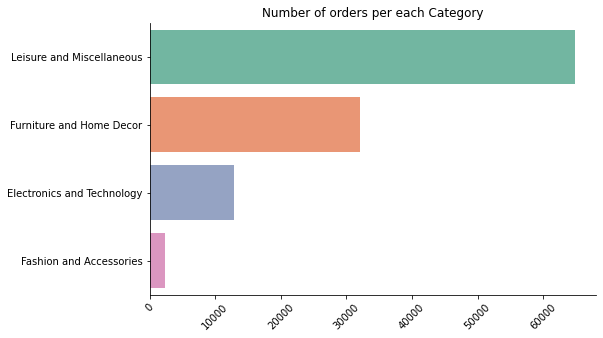

In [1966]:
plt.figure(figsize = (8, 5))
sns.barplot(x = df_final['product_category'].value_counts().values, 
            y = df_final['product_category'].value_counts().index, 
            palette = 'Set2')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

In [1967]:
# résultat franchement desequilibré...

In [1968]:
# (WIP) Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
# mettre shipping limit date en datetime avant
#df_final.drop((df_final[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_final['shipping_limit_date'] < 0]).index, inplace = True)

In [1969]:
# (WIP) - idem que cellule précédante, passer dates str -> dt
"""
# Shipping stat  S <-> C
# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'
df_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')
# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'
df_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
"""

"\n# Shipping stat  S <-> C\n# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'\ndf_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'\ndf_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n"

In [1970]:
########## DATES ##########

# 'order_purchase_timestamp'
# 'order_approved_at'
# 'order_delivered_carrier_date'
# 'order_delivered_customer_date'
# 'order_estimated_delivery_date'
# 'shipping_limit_date'
# 'review_creation_date'
# 'review_answer_timestamp'

# convertir en dt
dates_to_convert = ['review_answer_timestamp',
                    'review_creation_date',
                    'order_purchase_timestamp',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date']

for x in dates_to_convert:
    df_final[x] = pd.to_datetime(df_final[x])

# créer les nouvelles features :
# - delta entre date envoi questionnaire satisfaction et réponse (pour avoir vitesse de réponse)
df_final['review_time'] = (df_final['review_answer_timestamp'] - df_final['review_creation_date']).dt.total_seconds()/(3600*24)

# - delta entre date d'achat et date effective de livraison
df_final['order_time'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.total_seconds()/(3600*24)

# - delta entre livraison estimée et livraison effective
df_final['delivery_error_time'] = (df_final['order_delivered_customer_date'] - df_final['order_estimated_delivery_date']).dt.total_seconds()/(3600*24)

# - delta envoi de la commande par le vendeur (temps de préparation de la commande)
df_final['order_preparation_time'] = (df_final['order_delivered_carrier_date'] - df_final['order_approved_at']).dt.total_seconds()/(3600*24)

# - temps de livraison
df_final['delivery_time'] = (df_final['order_delivered_customer_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# - est ce que le vendeur a dépassé le shipping limit date ou non ?
df_final['shipping_limit_respect'] = (df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# drop features qui ne nous intéressent plus
df_final.drop(['review_answer_timestamp',
                    'review_creation_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date'], axis = 1, inplace = True)

# Ajout heure, jour, mois de l'achat
df_final['purchase_time']  = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['purchase_year'] = df_final['purchase_time'].dt.year
df_final['purchase_month'] = df_final['purchase_time'].dt.month
df_final['purchase_dayofweek'] = df_final['purchase_time'].dt.dayofweek
df_final['purchase_day'] = df_final['purchase_time'].dt.day
df_final['purchase_hour'] = df_final['purchase_time'].dt.hour

In [1971]:
df_final['purchase_time']

0        2017-05-16 15:05:35
1        2018-01-12 20:48:24
2        2018-05-19 16:07:45
3        2018-03-13 16:06:38
4        2018-07-29 09:51:30
                 ...        
119013   2018-04-07 15:48:17
119014   2018-04-04 08:20:22
119015   2018-04-08 20:11:50
119016   2017-11-03 21:08:33
119017   2017-12-19 14:27:23
Name: purchase_time, Length: 119018, dtype: datetime64[ns]

In [1972]:
df_final['order_purchase_timestamp'].unique()

array(['2017-05-16T15:05:35.000000000', '2018-01-12T20:48:24.000000000',
       '2018-05-19T16:07:45.000000000', ...,
       '2018-04-08T20:11:50.000000000', '2017-11-03T21:08:33.000000000',
       '2017-12-19T14:27:23.000000000'], dtype='datetime64[ns]')

In [1973]:
########### REVIEWS ##########

df_final.loc[df_final['review_comment_message'].isna()]

# new feature -> review text oui/non

#df_final['full_written_review'] = 1
#df_final['full_written_review'].loc[df_final['review_comment_message'].isna()] = 0

#df_final['written_review_title'] = 1
#df_final['written_review_title'].loc[df_final['review_comment_title'].isna()] = 0

df_final['review'] = 1
df_final['review'].loc[df_final['review_comment_message'].isna()] = 0
df_final['review'].loc[df_final['review_comment_title'].isna()] = 0

# drop les titres et textes des reviews (en portugais)
df_final.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [1974]:
########### VOLUME (cm3) ##########
# volume = height*lenght*width (va permettre de passer de 3 variables à 1)

df_final['product_volume_cm3'] = df_final['product_length_cm'] \
                               * df_final['product_height_cm'] \
                               * df_final['product_width_cm']

df_final.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1, inplace = True)

In [1975]:
# frequence des commandes

# 2 ans de données -> prendre fréquence sur 6 mois ? ou prendre sur toutes les données ?

In [1976]:
# https://blog.smile.io/how-to-calculate-purchase-frequency/

# customer order frequency = purchase frequency
# number of times that your customers make a purchase from you within a specified period of time

# Repeat Purchase Rate (RPR)
# = number of customers who bought more than once (365 days) divided by number of customers (365 days)

# Purchase Frequency (PF)
# = number of orders (365 days) divided by number of unique customers (365 days)

# Time Between Purchases (TBP)
# = 365 days divided by purchase frequency

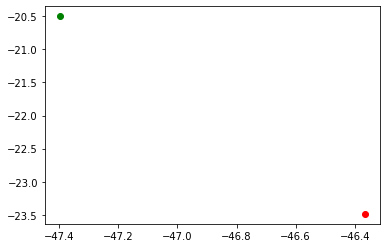

In [1977]:
# plotter customer et seller -> TO DO -> VOIR SI J'ARRIVE A FAIRE  (parce que un peu moisi en l'état)

plt.figure()
plt.scatter(x = df_final['seller_geolocation_lng'][0], y = df_final['seller_geolocation_lat'][0], c = 'red') # sellers
plt.scatter(x = df_final['customer_geolocation_lng'][0], y = df_final['customer_geolocation_lat'][0], c = 'green') # customers
plt.show()

In [1978]:
########### DISTANCE VENDEUR - ACHETEUR (km) ##########
# Calculer distance en km entre vendeur et acheteur

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# calcul de la distance
df_final['distance'] = df_final.apply(lambda x: haversine(x['seller_geolocation_lat'],
                                                          x['seller_geolocation_lng'],
                                                          x['customer_geolocation_lat'],
                                                          x['customer_geolocation_lng']) * 0.90, axis = 1)

# droper coordonnées (car ne sera plus utile)
df_final.drop(
    [
        'seller_geolocation_lat', 
        'seller_geolocation_lng', 
        'customer_geolocation_lat', 
        'customer_geolocation_lng'
    ], 
    axis = 1, 
    inplace = True)

In [1979]:
df_final.sample(6)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,Count,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance
6896,e9400e3d4945ada34b67e31c4c02d85f,c79719fb0dffa4835479293c560b56fe,vila velha,ES,0e8488c62611eb99cdf174e019bf9d8a,delivered,2018-08-03 16:37:04,1.0,7efbc2ce01bc5ac5d5390c330f90376e,0241d4d5d36f10f80c644447315af0bd,269.00,44.55,curitiba,PR,59.0,478.0,1.0,7550.0,1.0,credit_card,5.0,313.55,2963e0cac76a11b6291068cb49d67e94,5.0,1,Furniture and Home Decor,4.79035,10.14424,-7.16336,3.00039,7.13456,0.99961,2018-08-03 16:37:04,2018.0,8.0,4.0,3.0,16.0,0,32760.0,970.10651
80736,71cc3bf088359c35394726b0334ec7c6,aa36dbb653e613a2b3871f8660c396f3,sao joao batista,SC,d205894f6421e164996e5cc460dea4ff,delivered,2017-09-04 14:26:44,1.0,8abe436e6720087517880868bee69fab,c3cfdc648177fdbbbb35635a37472c53,180.00,14.99,curitiba,PR,59.0,1455.0,1.0,2200.0,1.0,boleto,1.0,194.99,d49461e0e76a7d3fdced3e52e481690b,5.0,1,Leisure and Miscellaneous,0.92752,10.00468,-13.39343,1.45976,7.96336,7.54024,2017-09-04 14:26:44,2017.0,9.0,0.0,4.0,14.0,0,21600.0,126.38419
34522,6957a0b44d49ff48e3bb939fe3432f41,a1d6418fe32f5acbc6780e5840df0408,cuiaba,MT,070a62ae87136bfbe6ef6d0e2883cda5,delivered,2018-06-23 19:34:03,1.0,53ae5df71df97b2b9abee97ce1e1b8f1,8444e55c1f13cd5c179851e5ca5ebd00,299.00,44.37,congonhal,MG,44.0,3049.0,3.0,850.0,1.0,boleto,1.0,343.37,37c30633484c5746a10d2722b17229f0,4.0,1,Leisure and Miscellaneous,1.77097,41.19054,-4.99414,27.35245,11.41905,-10.35668,2018-06-23 19:34:03,2018.0,6.0,5.0,23.0,19.0,0,10648.0,1117.31236
45450,0c0770e40680fcb4ae855ee1493ff116,ef7bbc96acc16599dbd8461a8eed42f6,rio de janeiro,RJ,ec7374fe6c0218473cecb08f8fbeca34,delivered,2018-03-19 20:17:12,1.0,64fb265487de2238627ce43fe8a67efc,4a3ca9315b744ce9f8e9374361493884,92.90,24.86,ibitinga,SP,55.0,329.0,1.0,1825.0,1.0,boleto,1.0,117.76,901cc384df505ae8f92dd2cfdfb525d7,3.0,1,Furniture and Home Decor,4.09622,31.83904,0.68432,0.68560,29.87624,5.31440,2018-03-19 20:17:12,2018.0,3.0,0.0,19.0,20.0,0,20944.0,552.29561
51867,9ec5d37080b7cb6a7297ae7e58429851,89c6ee9b56031347d5c4509ba326ecb9,rio de janeiro,RJ,41fd531c328f5d4a978b612a04dc576b,delivered,2018-08-10 16:48:29,1.0,2772d1e494d431a05b7bcc95b02163b6,d4910f1cdcfdabd48d6b316e395d4a23,95.28,18.91,santo andre,SP,57.0,2093.0,4.0,1550.0,1.0,credit_card,2.0,114.19,efe99461b3a9360b4c79f00ca9a685e8,5.0,1,Leisure and Miscellaneous,3.06182,5.88469,-6.41498,2.83926,3.03433,3.16074,2018-08-10 16:48:29,2018.0,8.0,4.0,10.0,16.0,0,25600.0,323.44508
36896,1ed1934ecae75619009545519aebab61,e6e62ad03df4dc30856d12fe2c1c1366,maracanau,CE,03e2b2c32adfd7016fbdf98a70a7077c,delivered,2018-05-13 18:33:05,1.0,0eb8e03d4ef83152c4642b606b5bbdec,cac4c8e7b1ca6252d8f20b2fc1a2e4af,29.99,15.16,indaiatuba,SP,47.0,348.0,1.0,2900.0,1.0,credit_card,1.0,45.15,38f0416ee0f11928ae6f8a2fcfccece0,3.0,1,Furniture and Home Decor,2.68877,22.10440,-8.12263,1.61531,20.47459,2.38469,2018-05-13 18:33:05,2018.0,5.0,6.0,13.0,18.0,0,14000.0,1649.06664


In [1980]:
# Export données 'propres' au format pickle pour rfm (garder id etc)

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df_for_rfm')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df_final, f)

## Pré selection des variables

In [1981]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'freight_value', 'seller_city',
       'seller_state', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'Count', 'product_category', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'delivery_time', 'shipping_limit_respect', 'purchase_time',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'review', 'product_volume_cm3', 'distance'],
      dtype='object')

In [1982]:
########## Drop des variables non pertinentes pour le clustering ##########

# Dropper les identifiants (ne seront plus utiles par la suite), purchase_time et 
# order_purchase_timestamp (dates et heures) ainsi que les villes, états... (on garde les coordonnées geo)

features_to_drop = [
    'seller_city', 
    'seller_state', 'customer_id', 'order_id', 'product_id', 'seller_id', 'review_id'
]


df = df_final.drop(features_to_drop, 
                   axis = 1)

df.sample(5)

,customer_unique_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,Count,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance
89745,e43c79f1725163f136503e7b42699b35,sao paulo,SP,delivered,2017-03-16 19:13:10,1.0,32.90,14.11,35.0,222.0,5.0,500.0,1.0,boleto,1.0,47.01,2.0,1,Leisure and Miscellaneous,1.53329,7.91935,-12.27984,4.83904,3.08031,1.16096,2017-03-16 19:13:10,2017.0,3.0,3.0,16.0,19.0,0,8004.0,295.02938
66187,bb80430dfc6dd81aa3ed50d18013fa41,ipumirim,SC,delivered,2017-05-21 11:15:14,1.0,13.98,15.10,59.0,409.0,1.0,225.0,1.0,credit_card,2.0,29.08,5.0,1,Electronics and Technology,1.96764,7.95817,-14.57292,3.91515,4.03264,0.08485,2017-05-21 11:15:14,2017.0,5.0,6.0,21.0,11.0,0,864.0,605.68197
117056,039a597bb045646b899477a8480bdd93,santa barbara d oeste,SP,delivered,2017-04-30 19:14:32,1.0,35.00,10.96,57.0,573.0,8.0,200.0,1.0,voucher,1.0,45.96,1.0,1,Leisure and Miscellaneous,1.21994,14.88451,-7.31373,1.70932,13.16781,3.29068,2017-04-30 19:14:32,2017.0,4.0,6.0,30.0,19.0,0,352.0,89.69583
18163,d4cfcbffecd24af269cf47885448de53,vitoria da conquista,BA,delivered,2017-06-16 08:11:05,3.0,33.41,16.79,53.0,313.0,1.0,500.0,1.0,credit_card,9.0,200.80,5.0,1,Leisure and Miscellaneous,1.04113,17.24897,-14.41000,3.21803,14.02118,2.78197,2017-06-16 08:11:05,2017.0,6.0,4.0,16.0,8.0,0,1188.0,847.27637
42038,0424c5ebdb5ce70bcd7b596efb17b561,brasilia,DF,delivered,2017-03-13 07:54:19,1.0,1309.99,45.74,56.0,1099.0,3.0,9300.0,1.0,credit_card,8.0,1355.73,5.0,1,Leisure and Miscellaneous,3.45414,31.36675,-24.30387,8.05137,23.31538,23.94863,2017-03-13 07:54:19,2017.0,3.0,0.0,13.0,7.0,0,39237.0,537.84185


## Duplicats

In [1983]:
# Vérifier qu'il n'y a pas de duplicats

print("\nPourcentage de duplicats :", end = "\n = ")
print(round((df.duplicated().sum().sum()/np.product(df.shape))*100, 2), end = " % \n")


Pourcentage de duplicats :
 = 0.0 % 


In [1984]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119013    False
119014    False
119015    False
119016    False
119017    False
Length: 119018, dtype: bool

In [1985]:
df.drop_duplicates(inplace = True)

## Imputation valeurs manquantes

In [1986]:
df.shape

(119008, 34)

In [1987]:
# ICI faire "controle qualité" et regarder données manquantes + faire imputation données manquantes ou drop des variables pour lesquelles les données sont trop éparses
df.isna().sum()

customer_unique_id               0
customer_city                    0
customer_state                   0
order_status                   616
order_purchase_timestamp       616
order_item_id                 1268
price                         1268
freight_value                 1268
product_name_lenght           2962
product_description_lenght    2962
product_photos_qty            2962
product_weight_g              1288
payment_sequential             619
payment_type                   619
payment_installments           619
payment_value                  619
review_score                  1593
Count                            0
product_category              7021
review_time                   1593
order_time                    3293
delivery_error_time           3293
order_preparation_time        2046
delivery_time                 3294
shipping_limit_respect        2032
purchase_time                  616
purchase_year                  616
purchase_month                 616
purchase_dayofweek  

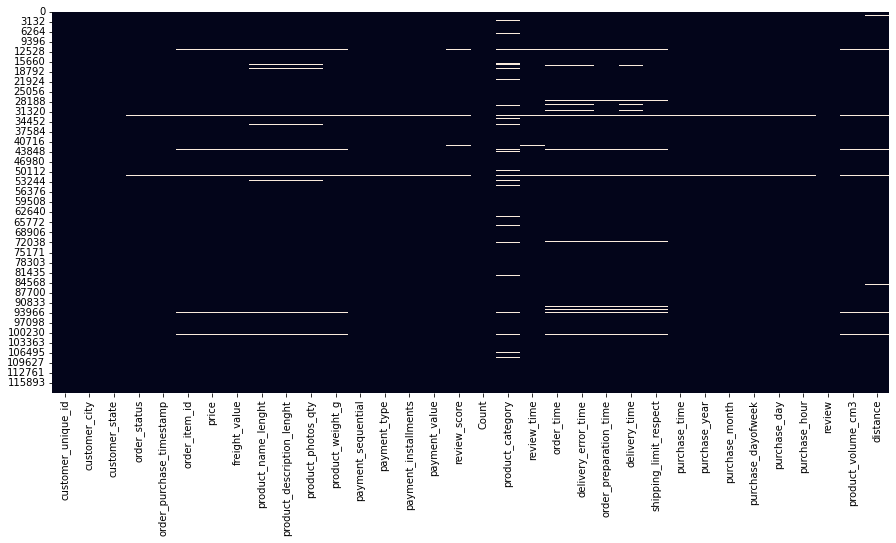

In [1988]:
# heatmap des na
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [1989]:
# Plusieurs lignes sur la heatmap -> commandes pour lesquelles il y a beaucoup de données manquantes
# sont probablement les commandes qui n'ont pas abouti
# les supprimer - on a 41 variables, prendre un seuil de 15 ou 20 variables pour dropper

# nombre de lignes avant traitement -> 119018
# seuil < 20 NaN -> 118377 rows restants
# seuil < 15 NaN -> 117740 rows restants
# seuil < 10 NaN -> 117738 rows restants
# -> peu de différences entre 10 et 15 - prendre 10

df = df[df.isna().sum(axis = 1) < 10]

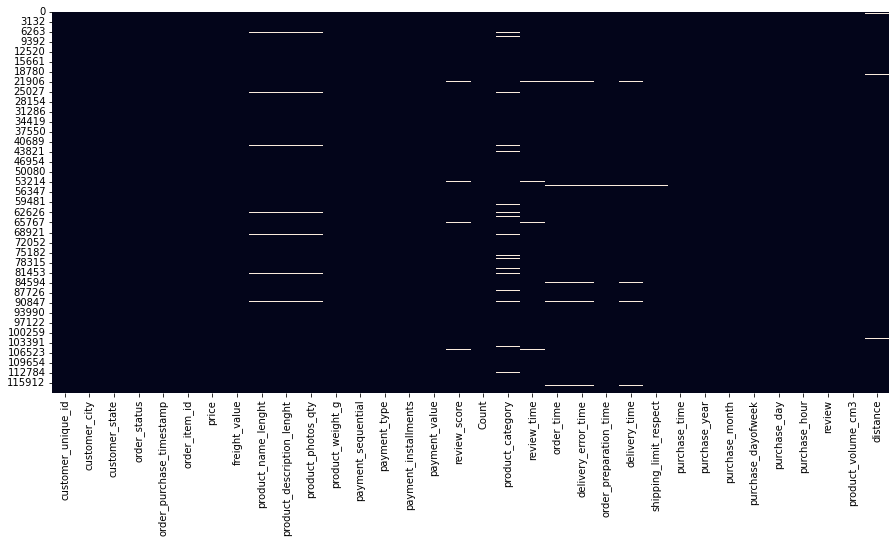

In [1990]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [1991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117739 entries, 0 to 119017
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customer_unique_id          117739 non-null  object        
 1   customer_city               117739 non-null  object        
 2   customer_state              117739 non-null  object        
 3   order_status                117739 non-null  object        
 4   order_purchase_timestamp    117739 non-null  datetime64[ns]
 5   order_item_id               117739 non-null  float64       
 6   price                       117739 non-null  float64       
 7   freight_value               117739 non-null  float64       
 8   product_name_lenght         116046 non-null  float64       
 9   product_description_lenght  116046 non-null  float64       
 10  product_photos_qty          116046 non-null  float64       
 11  product_weight_g            117719 non-

In [1992]:
# tableau nombre et pourcentage de valeurs manquantes par colonne
print('\nValeurs manquantes par colonne : \n')
pd.set_option('display.max_rows', None) # pour afficher toutes les lignes
values = df.isnull().sum()
percentage = 100 * values / len(df)
table = pd.concat([values, percentage.round(2)], axis = 1)
table.columns = ['Nombres de valeurs manquantes', '% de valeurs manquantes']
display(table[table['Nombres de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False))
pd.reset_option('display.max_rows') # on reset l'option pour ne plus afficher toutes les lignes


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
product_category,5752,4.89
delivery_time,2025,1.72
delivery_error_time,2024,1.72
order_time,2024,1.72
product_description_lenght,1693,1.44
product_name_lenght,1693,1.44
product_photos_qty,1693,1.44
review_score,960,0.82
review_time,960,0.82
order_preparation_time,778,0.66


In [1993]:
# Variables pour lesquelles il reste des NaN (faible pourcentage):

# VARIABLES QUALI
## product_category_name_english
## payment_type

# VARIABLES QUANTI
## payment_sequential
## product_name_lenght
## product_description_lenght
## product_photos_qty
## product_weight_g
## payment_installments
## payment_value
## review_score
## review_time
## order_time
## delivery_error_time
## order_preparation_time
## delivery_time
## shipping_limit_respect
## product_volume_cm3
## distance

In [1994]:
# VARIABLES QUALI
# Traiter modalité par modalité et remplacer les NaN par la modalité la plus fréquente

# Catégories de produits
df['product_category'].value_counts()

Leisure and Miscellaneous     64805
Furniture and Home Decor      32024
Electronics and Technology    12811
Fashion and Accessories        2347
Name: product_category, dtype: int64

In [1995]:
# Most common = 'bed_bath_table' - ou remplacer par 'unknown' ?? ou par rien ?

df['product_category'].fillna('', inplace = True)

In [1996]:
# Type de paiement
df['payment_type'].value_counts()

credit_card    86818
boleto         22922
voucher         6303
debit_card      1693
Name: payment_type, dtype: int64

In [1997]:
# Most common = credit_card

df['payment_type'].fillna('credit_card', inplace = True)

In [1998]:
# VARIABLES QUANTI

df_con = df.select_dtypes(include = ['int', 'float'])
col = df_con.columns

In [1999]:
df_con.shape

(117739, 26)

In [2000]:
# CHOIX DE K

# dépend du pb -> si supervisé -> comme projet 4
# dépend du métier -> des fois certains nb de voisins font sens
# quand non supervisé -> cacher des valeurs et voir avec quel K on les trouve (très rarement fait)
# prendre valeur par défaut

# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

# "The optimal K value usually found is the square root of N, where N is the total number of samples."

# Nb samples
N = df_con.shape[0]

optimal_K = sqrt(N)
optimal_K

343.1311702541755

In [2001]:
# mouaaaaaaaai....

In [2002]:
# KNN imputer
KNN_imputer = KNNImputer()
df_KNN = KNN_imputer.fit_transform(df_con)

In [2003]:
# donne un array - le convertir en df
df_con = pd.DataFrame(df_KNN, columns = col)

In [2004]:
# mettre variables quali au même format que quanti
df_cat = df.select_dtypes(include = ['object'])
col = df_cat.columns

df = pd.concat([df_con, df_cat], axis = 1, join = 'inner')
df

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,Count,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance,customer_unique_id,customer_city,customer_state,order_status,payment_type,product_category
0,1.0,124.99,21.88,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,1.0,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017.0,5.0,1.0,16.0,15.0,0.0,107136.0,228.79538,861eff4711a542e4b93843c6dd7febb0,franca,SP,delivered,credit_card,Furniture and Home Decor
1,1.0,289.00,46.48,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,1.0,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018.0,1.0,4.0,12.0,20.0,0.0,53400.0,302.71858,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,delivered,credit_card,Furniture and Home Decor
2,1.0,139.94,17.79,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,1.0,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018.0,5.0,5.0,19.0,16.0,0.0,45968.0,29.14657,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,delivered,credit_card,Furniture and Home Decor
3,1.0,149.94,23.36,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,1.0,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018.0,3.0,1.0,13.0,16.0,0.0,79968.0,18.11744,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,delivered,credit_card,Furniture and Home Decor
4,1.0,230.00,22.25,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,1.0,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018.0,7.0,6.0,29.0,9.0,1.0,23625.0,187.45960,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117734,1.0,74.90,13.88,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,1.0,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018.0,4.0,5.0,7.0,15.0,0.0,11132.0,329.23572,e5f6bf6e4999102bc5405eb858869122,brasilia,DF,delivered,boleto,Leisure and Miscellaneous
117735,1.0,114.90,14.16,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,1.0,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018.0,4.0,2.0,4.0,8.0,0.0,13200.0,188.57356,23eeaf77f8c29ea22ced2a3fa0bc360b,campo grande,MS,delivered,credit_card,Leisure and Miscellaneous
117736,1.0,37.00,19.04,60.0,575.0,1.0,870.0,1.0,5.0,56.04,1.0,1.0,4.07022,30.95237,7.79392,0.89044,30.04928,3.10956,2018.0,4.0,6.0,8.0,20.0,1.0,9000.0,1662.21122,e12941e501c78f88e7de3971418cecf3,rio de janeiro,RJ,delivered,credit_card,Leisure and Miscellaneous
117737,1.0,689.00,22.07,59.0,452.0,1.0,710.0,1.0,2.0,711.07,5.0,1.0,2.98215,12.95146,-18.16760,2.87038,10.06525,3.11887,2017.0,11.0,4.0,3.0,21.0,0.0,3458.0,628.26583,163e0b7002565ee6de0ee531c1b491d1,sumare,SP,delivered,credit_card,Electronics and Technology


In [2005]:
df.isna().sum()

order_item_id                 0
price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
Count                         0
review_time                   0
order_time                    0
delivery_error_time           0
order_preparation_time        0
delivery_time                 0
shipping_limit_respect        0
purchase_year                 0
purchase_month                0
purchase_dayofweek            0
purchase_day                  0
purchase_hour                 0
review                        0
product_volume_cm3            0
distance                      0
customer_unique_id            0
customer_city                 0
customer_state                0
order_status                  0
payment_type                  0
product_

## Outliers

In [2006]:
# plus de nan -> ok pour isolation forest

# outliers detectés grâce aux boxplots
# vérifier avec Isolation Forest et supprimer lignes correspondantes

np.random.seed(1)

clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([ 1,  1,  1, ..., -1,  1,  1])

In [2007]:
# anomalies ont un score de -1 : on les enlève
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(106781, 32)

In [2008]:
df

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,Count,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance,customer_unique_id,customer_city,customer_state,order_status,payment_type,product_category
0,1.0,124.99,21.88,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,1.0,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017.0,5.0,1.0,16.0,15.0,0.0,107136.0,228.79538,861eff4711a542e4b93843c6dd7febb0,franca,SP,delivered,credit_card,Furniture and Home Decor
1,1.0,289.00,46.48,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,1.0,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018.0,1.0,4.0,12.0,20.0,0.0,53400.0,302.71858,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,delivered,credit_card,Furniture and Home Decor
2,1.0,139.94,17.79,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,1.0,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018.0,5.0,5.0,19.0,16.0,0.0,45968.0,29.14657,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,delivered,credit_card,Furniture and Home Decor
3,1.0,149.94,23.36,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,1.0,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018.0,3.0,1.0,13.0,16.0,0.0,79968.0,18.11744,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,delivered,credit_card,Furniture and Home Decor
4,1.0,230.00,22.25,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,1.0,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018.0,7.0,6.0,29.0,9.0,1.0,23625.0,187.45960,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117733,1.0,55.00,20.88,12.0,210.0,2.0,1100.0,1.0,1.0,75.88,1.0,1.0,0.93984,17.57944,-18.45272,2.77409,14.76108,13.22591,2017.0,12.0,6.0,17.0,23.0,0.0,26496.0,307.25951,3474afad3a0e7ed51985c504e936258d,brasilia,DF,delivered,credit_card,Leisure and Miscellaneous
117734,1.0,74.90,13.88,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,1.0,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018.0,4.0,5.0,7.0,15.0,0.0,11132.0,329.23572,e5f6bf6e4999102bc5405eb858869122,brasilia,DF,delivered,boleto,Leisure and Miscellaneous
117735,1.0,114.90,14.16,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,1.0,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018.0,4.0,2.0,4.0,8.0,0.0,13200.0,188.57356,23eeaf77f8c29ea22ced2a3fa0bc360b,campo grande,MS,delivered,credit_card,Leisure and Miscellaneous
117737,1.0,689.00,22.07,59.0,452.0,1.0,710.0,1.0,2.0,711.07,5.0,1.0,2.98215,12.95146,-18.16760,2.87038,10.06525,3.11887,2017.0,11.0,4.0,3.0,21.0,0.0,3458.0,628.26583,163e0b7002565ee6de0ee531c1b491d1,sumare,SP,delivered,credit_card,Electronics and Technology


In [2010]:
df.groupby('customer_unique_id')['order_status'].value_counts()

customer_unique_id                order_status
0000366f3b9a7992bf8c76cfdf3221e2  delivered       1
0000b849f77a49e4a4ce2b2a4ca5be3f  delivered       1
0000f46a3911fa3c0805444483337064  delivered       1
0000f6ccb0745a6a4b88665a16c9f078  delivered       1
0004aac84e0df4da2b147fca70cf8255  delivered       1
                                                 ..
fffcf5a5ff07b0908bd4e2dbc735a684  delivered       2
fffea47cd6d3cc0a88bd621562a9d061  delivered       1
ffff371b4d645b6ecea244b27531430a  delivered       1
ffff5962728ec6157033ef9805bacc48  delivered       1
ffffd2657e2aad2907e67c3e9daecbeb  delivered       1
Name: order_status, Length: 87178, dtype: int64

In [2011]:
# GROUPBY CUSTOMER

df = df.groupby(['customer_unique_id'], as_index = False, dropna = False).agg({
    'customer_city' : 'first', # ville du client
    'customer_state' : 'first', # état du client
    'order_status' : 'first', # état de la commande (livée, en cours, etc)
    #'order_purchase_timestamp' : 'mean', # date d'achat - à virer
    'order_item_id' : 'mean', # nombre d'articles par commandes
    'price' : 'sum', # prix
    'freight_value' : 'mean', # prix du transport
    'product_name_lenght' : 'mean', # longueur du nom du produit
    'product_description_lenght' : 'mean', # longueur de la description du produit
    'product_photos_qty' : 'mean', # nombre de photos
    'product_weight_g' : 'mean', # poids du produit
    'payment_sequential' : 'mean', # nb de méthodes de paiement utilisées
    'payment_type' : 'first', # type du paiement (CB, cash, etc...)
    'payment_installments' : 'mean', # paiement en plusieurs fois
    'payment_value' : 'sum', # montant du paiment
    'review_score' : 'mean', # avis moyen
    'Count' : 'sum', # nombre de commandes
    'product_category' : 'first', # garder toutes les catégories si plusieurs commandes ?
    'review_time' : 'mean', # delta entre date envoi questionnaire satisfaction et réponse (pour avoir vitesse de réponse)
    'order_time' : 'mean', # delta entre date d'achat et date effective de livraison
    'delivery_error_time' : 'mean', # delta entre livraison estimée et livraison effective
    'order_preparation_time' : 'mean', # delta envoi de la commande par le vendeur (temps de préparation de la commande)
    'delivery_time' : 'mean', # temps de livraison
    'shipping_limit_respect' : 'mean', # est ce que le vendeur a dépassé le shipping limit date ou non ?
    #'purchase_time', # date d'achat - à virer
    'purchase_year': 'first', # année d'achat
    'purchase_month': 'first', # mois d'achat
    'purchase_dayofweek': 'first', # jour de la semaine (achat)
    'purchase_day': 'first', # jour d'achat
    'purchase_hour': 'first', # heure d'achat
    'review' : 'sum', # client laisse un avis ou non
    'product_volume_cm3' : 'mean', # volume des objets achetés
    'distance' : 'mean' # distance vendeur - client
})

In [2012]:
# nb total de produits commandés par client
# nb de commandes * nb moyen de produits commandés à chaque fois
df['product_nb'] = df['Count'] * df['order_item_id']

# drop les deux autres colonnes
df.drop(['Count', 'order_item_id'], axis = 1, inplace = True)

In [2013]:
df

,customer_unique_id,customer_city,customer_state,order_status,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance,product_nb
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,delivered,59.00,17.66,59.0,341.0,2.0,1750.0,1.0,credit_card,1.0,153.32,5.0,Furniture and Home Decor,1.07726,20.03425,-6.05644,4.45537,15.04973,1.02104,2017.0,11.0,3.0,30.0,21.0,0.0,32560.0,522.64137,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,delivered,38.89,17.60,43.0,932.0,2.0,888.0,1.0,credit_card,1.0,56.49,3.0,Leisure and Miscellaneous,3.44966,12.19858,-13.03156,5.03962,7.14767,-0.03962,2017.0,10.0,6.0,29.0,18.0,0.0,10500.0,449.30981,1.0
2,0000f46a3911fa3c0805444483337064,sao jose,SC,delivered,19.90,15.23,52.0,537.0,1.0,200.0,1.0,credit_card,3.0,35.13,5.0,Leisure and Miscellaneous,2.72089,8.73935,-37.26002,2.76144,5.34414,8.23856,2018.0,5.0,0.0,7.0,0.0,1.0,2058.0,413.70753,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,delivered,65.00,15.20,26.0,1465.0,1.0,1032.0,1.0,credit_card,8.0,160.40,4.0,Electronics and Technology,4.94556,4.72493,-17.39703,0.93904,3.78174,6.06096,2017.0,8.0,6.0,27.0,21.0,0.0,4080.0,400.97958,1.0
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,delivered,10.90,8.72,53.0,2504.0,1.0,100.0,1.0,credit_card,1.0,19.62,5.0,Electronics and Technology,0.53486,11.00829,-27.41348,4.49551,4.93519,-2.07310,2017.0,1.0,3.0,5.0,13.0,0.0,352.0,7.03319,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,delivered,120.00,13.78,35.0,569.0,1.0,2400.0,1.0,credit_card,2.0,442.68,2.0,Leisure and Miscellaneous,0.78613,4.77862,-16.40565,1.52248,2.96241,4.47292,2018.0,4.0,0.0,30.0,19.0,2.0,27000.0,142.63426,5.0
87095,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,delivered,105.00,47.00,55.0,60.0,1.0,2800.0,1.0,credit_card,2.0,46.21,5.0,,2.92589,24.05120,-36.19483,4.97340,19.06976,2.02660,2017.0,12.0,4.0,15.0,18.0,0.0,24000.0,1871.99597,1.0
87096,ffff371b4d645b6ecea244b27531430a,sinop,MT,delivered,39.99,12.79,49.0,120.0,1.0,650.0,1.0,credit_card,2.0,52.78,5.0,Leisure and Miscellaneous,0.99285,7.83370,-5.31527,1.47815,6.34862,2.52185,2018.0,5.0,0.0,7.0,20.0,1.0,26928.0,291.16574,1.0
87097,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,ES,delivered,449.90,20.72,31.0,329.0,1.0,471.0,1.0,credit_card,5.0,470.62,1.0,Leisure and Miscellaneous,0.43470,12.23999,-15.11740,4.13793,8.09523,2.86207,2017.0,6.0,3.0,15.0,15.0,0.0,3240.0,588.08061,1.0


## Analyse univariée

In [2014]:
# Faire une analyse par variable pour avoir quelque chose de propre et bien détécter outliers ou incohérences ?

In [2015]:
# faire un graph qui regroupe évolution par mois du nb de commandes, du nb de clients et du CA etc
# idem avec toutes les dates

In [2016]:
df.select_dtypes(include = ['float64']).columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'review', 'product_volume_cm3', 'distance',
       'product_nb'],
      dtype='object')

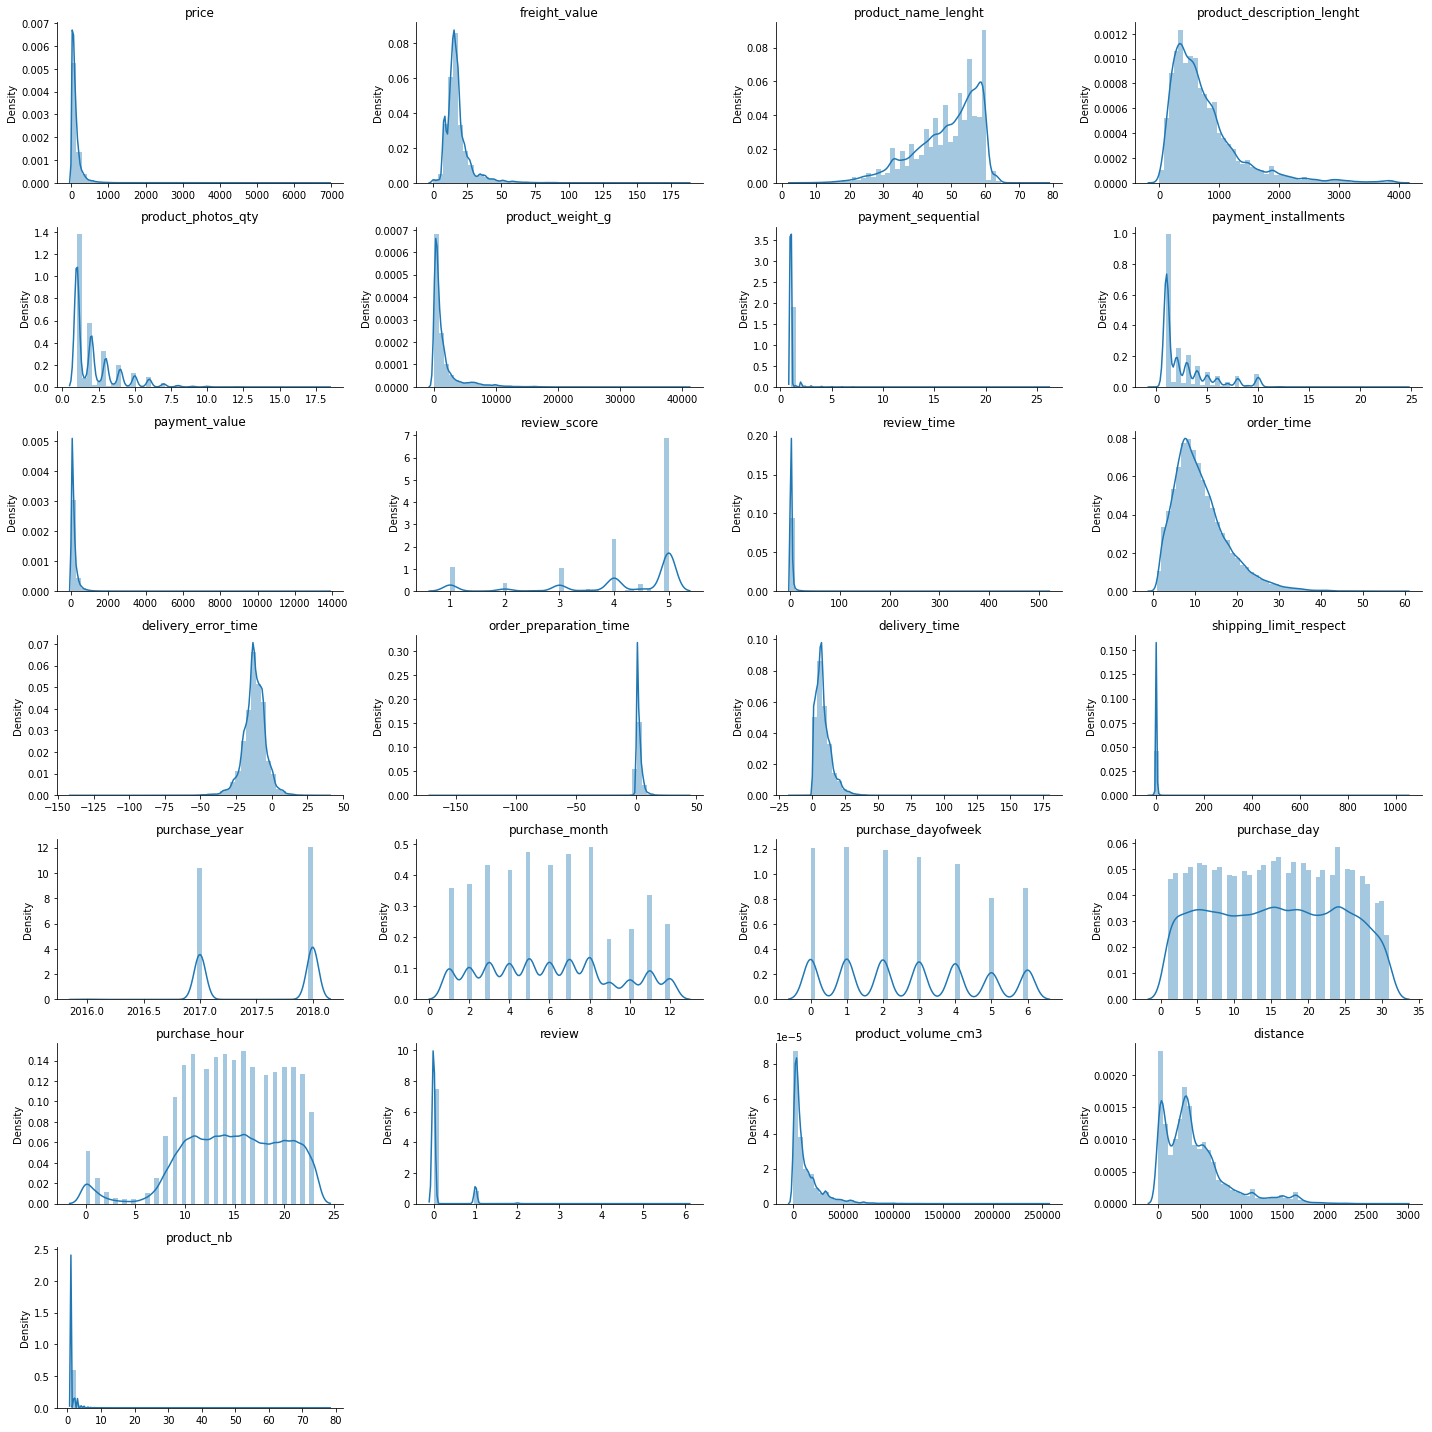

In [2017]:
# Displots des variables quantitatives (variables continues seulement)

columns = ['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'review', 'product_volume_cm3', 'distance',
       'product_nb']

nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 20))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 4, index + 1)
    sns.distplot(x = df[col])
    plt.title(col)
    sns.despine() # pour enlever limites du graph en haut et à droite

figure.tight_layout()
plt.show()

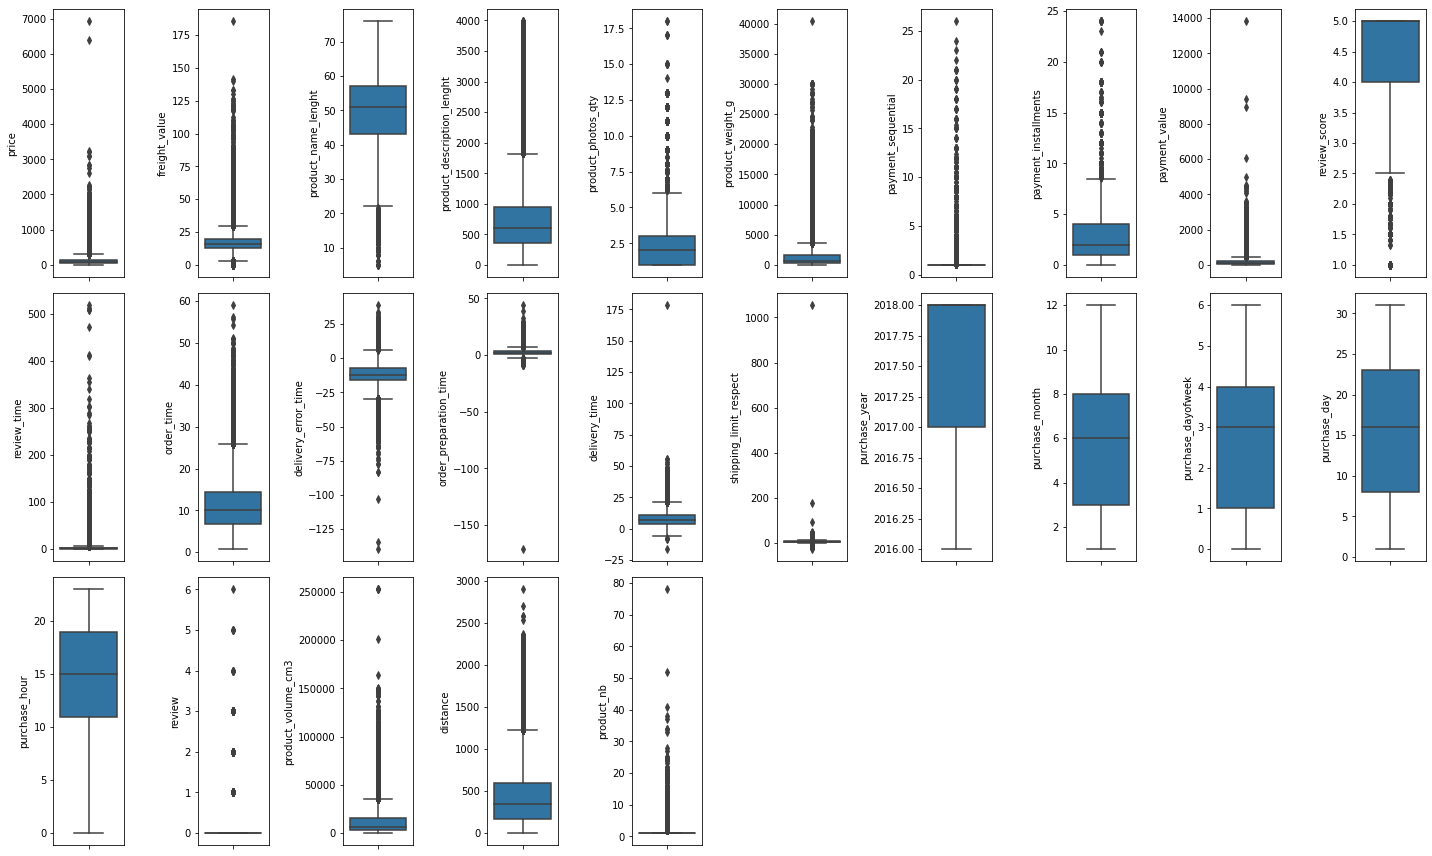

In [2018]:
# Boxplots des variables quantitatives

columns = df.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 12))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 4, not 5

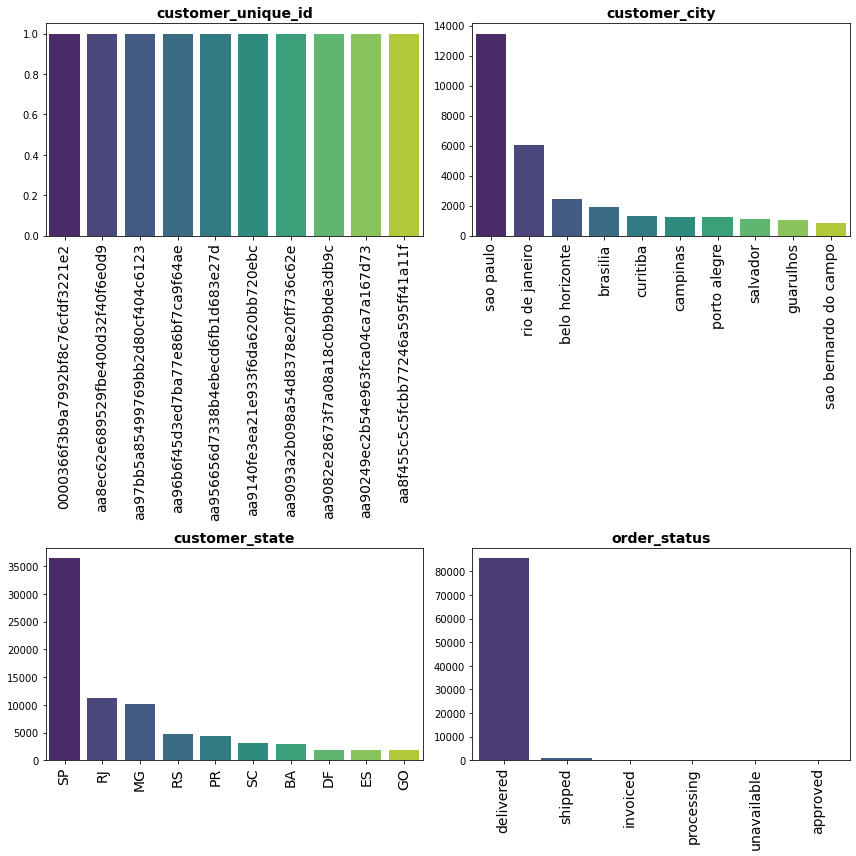

In [2019]:
# Barplot des variables qualitatives

columns = df.select_dtypes(include = ['object']).columns
size = round(math.sqrt(len(columns)))

plt.figure(figsize = (12, 12))
i = 0
for index, col in enumerate(columns):
    if df[col].str.len().mean() < 100: # prendre seulement les colonnes dont les elements ne sont pas trop longs (pour ne pas prendre les descriptions par ex)
        i += 1
        plt.subplot(size, size, i)
        plt.title(col, fontsize = 14, weight = 'bold')
        plt.xticks(fontsize = 14, rotation = 90)
        ax = sns.barplot(x = df[col].value_counts().index[:10],
                        y = df[col].value_counts()[:10],
                        palette = 'viridis')
        ax.set(ylabel = None) # pour enlever nom de l'axe y
        plt.tight_layout()
plt.show()

In [2020]:
# Order status -> à pas l'air franchement interessant - à ignorer pour le clustering

## Analyse bivariée

In [2021]:
df

,customer_unique_id,customer_city,customer_state,order_status,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,product_volume_cm3,distance,product_nb
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,delivered,59.00,17.66,59.0,341.0,2.0,1750.0,1.0,credit_card,1.0,153.32,5.0,Furniture and Home Decor,1.07726,20.03425,-6.05644,4.45537,15.04973,1.02104,2017.0,11.0,3.0,30.0,21.0,0.0,32560.0,522.64137,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,delivered,38.89,17.60,43.0,932.0,2.0,888.0,1.0,credit_card,1.0,56.49,3.0,Leisure and Miscellaneous,3.44966,12.19858,-13.03156,5.03962,7.14767,-0.03962,2017.0,10.0,6.0,29.0,18.0,0.0,10500.0,449.30981,1.0
2,0000f46a3911fa3c0805444483337064,sao jose,SC,delivered,19.90,15.23,52.0,537.0,1.0,200.0,1.0,credit_card,3.0,35.13,5.0,Leisure and Miscellaneous,2.72089,8.73935,-37.26002,2.76144,5.34414,8.23856,2018.0,5.0,0.0,7.0,0.0,1.0,2058.0,413.70753,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,delivered,65.00,15.20,26.0,1465.0,1.0,1032.0,1.0,credit_card,8.0,160.40,4.0,Electronics and Technology,4.94556,4.72493,-17.39703,0.93904,3.78174,6.06096,2017.0,8.0,6.0,27.0,21.0,0.0,4080.0,400.97958,1.0
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,delivered,10.90,8.72,53.0,2504.0,1.0,100.0,1.0,credit_card,1.0,19.62,5.0,Electronics and Technology,0.53486,11.00829,-27.41348,4.49551,4.93519,-2.07310,2017.0,1.0,3.0,5.0,13.0,0.0,352.0,7.03319,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,delivered,120.00,13.78,35.0,569.0,1.0,2400.0,1.0,credit_card,2.0,442.68,2.0,Leisure and Miscellaneous,0.78613,4.77862,-16.40565,1.52248,2.96241,4.47292,2018.0,4.0,0.0,30.0,19.0,2.0,27000.0,142.63426,5.0
87095,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,delivered,105.00,47.00,55.0,60.0,1.0,2800.0,1.0,credit_card,2.0,46.21,5.0,,2.92589,24.05120,-36.19483,4.97340,19.06976,2.02660,2017.0,12.0,4.0,15.0,18.0,0.0,24000.0,1871.99597,1.0
87096,ffff371b4d645b6ecea244b27531430a,sinop,MT,delivered,39.99,12.79,49.0,120.0,1.0,650.0,1.0,credit_card,2.0,52.78,5.0,Leisure and Miscellaneous,0.99285,7.83370,-5.31527,1.47815,6.34862,2.52185,2018.0,5.0,0.0,7.0,20.0,1.0,26928.0,291.16574,1.0
87097,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,ES,delivered,449.90,20.72,31.0,329.0,1.0,471.0,1.0,credit_card,5.0,470.62,1.0,Leisure and Miscellaneous,0.43470,12.23999,-15.11740,4.13793,8.09523,2.86207,2017.0,6.0,3.0,15.0,15.0,0.0,3240.0,588.08061,1.0


In [2022]:
df.groupby('purchase_month')['product_nb'].sum()

purchase_month
1.0     10240.0
2.0     10373.0
3.0     12152.0
4.0     11691.0
5.0     13394.0
6.0     12215.0
7.0     13203.0
8.0     13736.0
9.0      5466.0
10.0     6560.0
11.0     9471.0
12.0     6715.0
Name: product_nb, dtype: float64

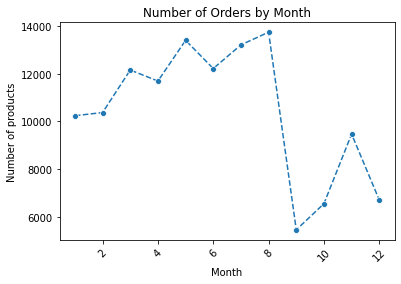

In [2023]:
## evolution du nb de commandes par mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['product_nb'].sum().index,
             y = df.groupby('purchase_month')['product_nb'].sum().values, 
             marker = 'o', 
             linestyle = '--')
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of products')
plt.xticks(rotation = 45)
plt.show()

In [2024]:
# Très peu de commandes en septembre
# Petit pic en Novembre (pour Noel ? )
# Majorité des commandes entre Mars et Aout

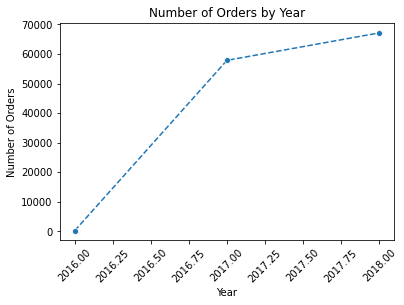

In [2025]:
## evolution du nb de commandes par année

plt.figure()
sns.lineplot(x = df.groupby('purchase_year')['product_nb'].sum().index,
             y = df.groupby('purchase_year')['product_nb'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

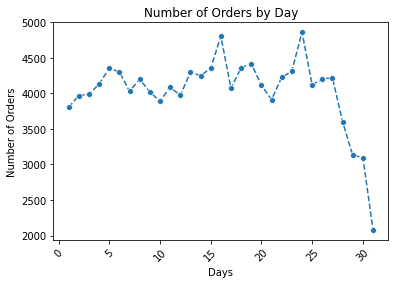

In [2026]:
## evolution du nb de commandes par jour du mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_day')['product_nb'].sum().index,
             y = df.groupby('purchase_day')['product_nb'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Day')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

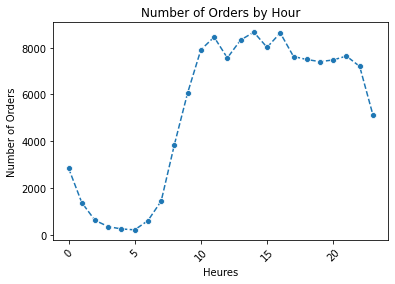

In [2027]:
## evolution du nb de commandes par heure de la journée

plt.figure()
sns.lineplot(x = df.groupby('purchase_hour')['product_nb'].sum().index,
             y = df.groupby('purchase_hour')['product_nb'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Hour')
plt.xlabel('Heures')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

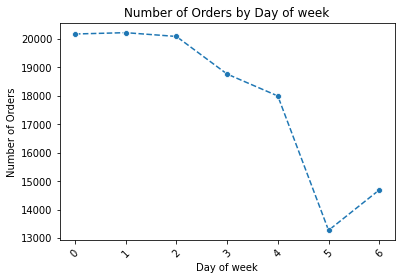

In [2028]:
## evolution du nb de commandes par jour de la semaine

plt.figure()
sns.lineplot(x = df.groupby('purchase_dayofweek')['product_nb'].sum().index,
             y = df.groupby('purchase_dayofweek')['product_nb'].sum().values, 
             marker = 'o', linestyle = '--')
plt.title('Number of Orders by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

In [2029]:
# Retrouver correspondance des jours de la semaine (0 = lundi ou 0 = dimanche ? )

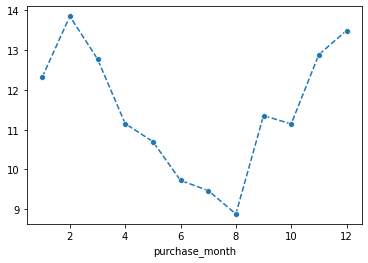

In [2030]:
# Evolution du temps des commandes (délai entre commande et livraison)

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['order_time'].mean().index, 
             y = df.groupby('purchase_month')['order_time'].mean().values, 
             marker = 'o', linestyle = '--')
plt.show()

In [2031]:
# délai de préparation des commandes et de livraison très court en été

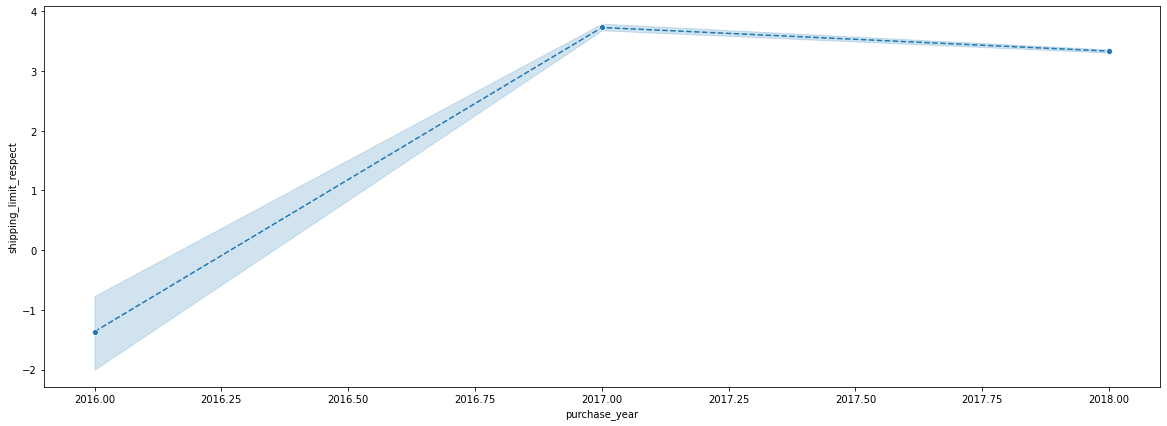

In [2032]:
# Evolution du retard de livraison en fonction des années (zoom sur 2017)

plt.figure(figsize = (20, 7))
sns.lineplot(data = df, 
             x = 'purchase_year', 
             y = 'shipping_limit_respect', 
             marker = 'o', linestyle = '--')
plt.show()

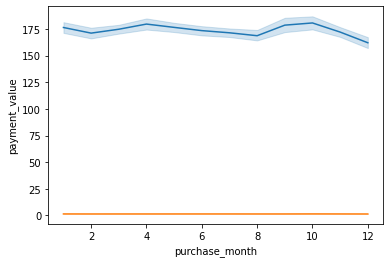

In [2033]:
# Ventes de la plateforme par mois vs nb de commandes par mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_month', y = 'payment_value', markers = True)
sns.lineplot(data = df, x = 'purchase_month', y = 'product_nb', markers = True)
plt.show()

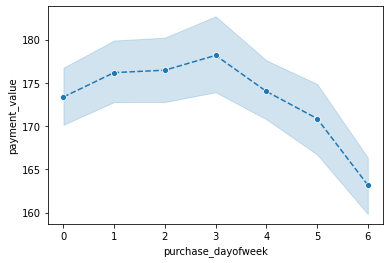

In [2034]:
# Ventes de la plateforme par jour de la semaine
# REMPLACER PAR HISTOGRAMME
# METTRE CORRESPONDANCE DES JOURS

plt.figure()
sns.lineplot(data = df, x = 'purchase_dayofweek', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

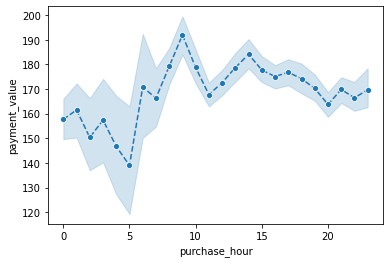

In [2035]:
# Ventes de la plateforme par heure de la journée

plt.figure()
sns.lineplot(data = df, x = 'purchase_hour', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

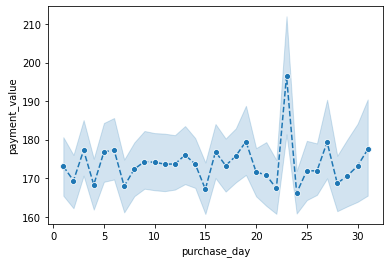

In [2036]:
# Ventes de la plateforme par jour du mois
# FAIRE HISTOGRAMMME A LA PLace

plt.figure()
sns.lineplot(data = df, x = 'purchase_day', y = 'payment_value', marker = 'o', linestyle = '--')
plt.show()

In [2037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87099 entries, 0 to 87098
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_unique_id          87099 non-null  object 
 1   customer_city               87099 non-null  object 
 2   customer_state              87099 non-null  object 
 3   order_status                87099 non-null  object 
 4   price                       87099 non-null  float64
 5   freight_value               87099 non-null  float64
 6   product_name_lenght         87099 non-null  float64
 7   product_description_lenght  87099 non-null  float64
 8   product_photos_qty          87099 non-null  float64
 9   product_weight_g            87099 non-null  float64
 10  payment_sequential          87099 non-null  float64
 11  payment_type                87099 non-null  object 
 12  payment_installments        87099 non-null  float64
 13  payment_value               870

In [2038]:
df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_category', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'delivery_time', 'shipping_limit_respect', 'purchase_year',
       'purchase_month', 'purchase_dayofweek', 'purchase_day', 'purchase_hour',
       'review', 'product_volume_cm3', 'distance', 'product_nb'],
      dtype='object')

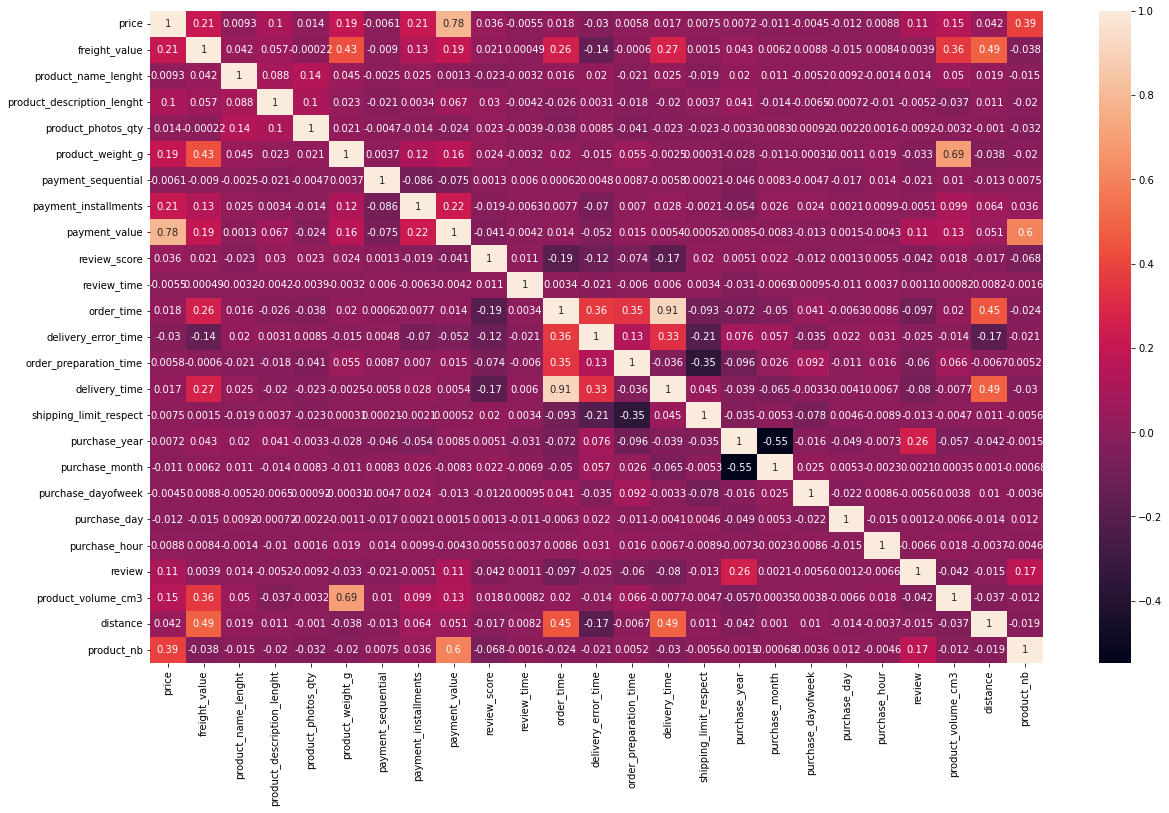

In [2039]:
# Matrice de corrélations
plt.figure(figsize = (20, 12))
try:
    sns.heatmap(df.corr(numeric_only = True), annot = True)
except:
    sns.heatmap(df.corr(), annot = True)
plt.show()

In [2040]:
# order_time et delivery_time très fortement corrélés -> garder un des deux seulement
# drop delivery_time car n'est pas fonction du client or ici on essaie de segmenter les comportements clients

# poids et volume fortement corrélés -> garder un des deux seulement
# poids et freight_value fortement corrélés
# freight_value et volume sont aussi fortement corrélés (moins que poids mais quand même)
# garder poids et supprimer les deux autres ? ou garder les deux autres et supprimer le poids ?
# supprimer freight_value car prit en compte dans payment_value
# supprimer volume et garder poids -> et faire l'inverse si résultats sont pas bons

# payment_value et price fortement corrélés -> garder un des deux seulement
# garder payment_value (car prend en compte prix de la livraison)

df.drop(['delivery_time', 'price', 'freight_value', 'product_volume_cm3'], axis = 1, inplace = True)

In [2041]:
# supprimer aussi purchase_year ?
# on a vu que le nombre de commandes a augmenté avec les années mais sinon pas pertinent pour notre
# problématique

#df.drop(['purchase_year'], axis = 1, inplace = True) # à garder car on en a besoin pour reconstituer la date ensuite

In [2042]:
df.reset_index(drop = True, inplace = True)

In [2043]:
df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'product_category', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'shipping_limit_respect', 'purchase_year',
       'purchase_month', 'purchase_dayofweek', 'purchase_day', 'purchase_hour',
       'review', 'distance', 'product_nb'],
      dtype='object')

In [2044]:
# Pairplot
plt.figure()
#sns.pairplot(df, hue = 'payment_type') # trop lourd avec couleur
#sns.pairplot(df) # trop lourd avec couleur # trop de variables, pas super lisible
plt.show()

<Figure size 432x288 with 0 Axes>

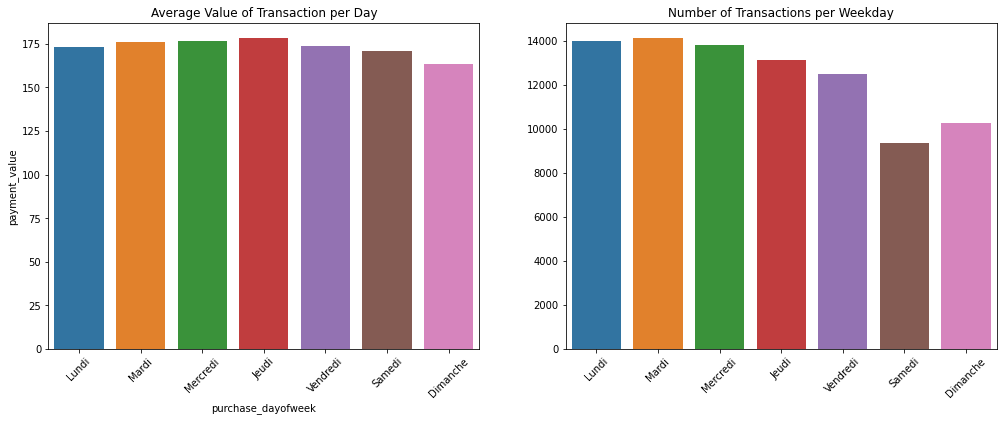

In [2045]:
# Montant moyen et nombre de transactions
# https://github.com/MGL56/Projet_4/blob/master/Projet_4.ipynb

# CHANGER LES COULEURS

# Les données sont groupés par la variable 'purchase_weekday' et moyennés
payment_value_weekday = df.groupby("purchase_dayofweek")["payment_value"].mean().sort_values(ascending = False).reset_index()
order_weekday = df["purchase_dayofweek"].value_counts().sort_index()

# Jours de la semaine
WEEK = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

fig = plt.figure(1, figsize = (17, 6))

# Bar plot du montant moyen dépensé pour chaque jour de la semaine
plt.subplot(121)
sns.barplot(data = payment_value_weekday, x = "purchase_dayofweek", y = "payment_value")
plt.title("Average Value of Transaction per Day")
plt.xticks(np.arange(7), WEEK, rotation = 45)

# Bar plot du nombre de transactions pour chaque jour de la semaine
plt.subplot(122)
sns.barplot(x = order_weekday.index, y = order_weekday.values)
plt.xticks(np.arange(7), WEEK, rotation = 45)
plt.title("Number of Transactions per Weekday")

plt.show()

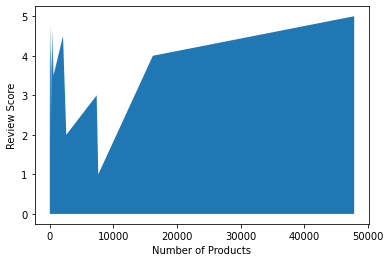

In [2046]:
# Evaluation des produits

# Nombre de produits pour chaque note
review_score = df['review_score'].value_counts()

# plot

# CHANGER COULEUR
plt.figure()
plt.fill_between(x = review_score.values, y1 = review_score.index)
plt.xlabel('Number of Products')
plt.ylabel('Review Score')
plt.show()

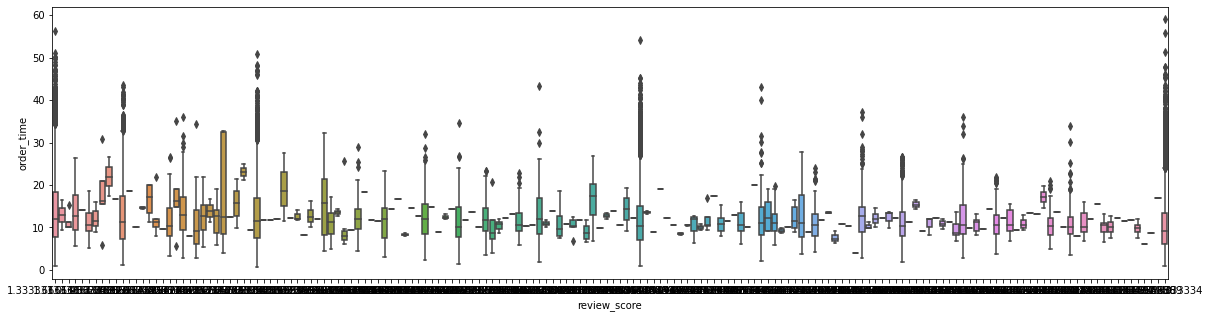

In [2047]:
# POURQUOI REVIEW SCORE = FLOAT ? 


# Boxplot du temps de livraison pour chaque note
plt.figure(figsize = (20, 5))
sns.boxplot(x = "review_score", 
            y = "order_time",
            data = df[df["order_time"] < 60])
plt.show()

In [2048]:
# Anova ??

# CONDITIONS D'APPLICATION

In [2049]:
def anova(df, variable):

    print('\t') 
    print('----------------------------------------------------')
    print('\nANOVA \n')
    print('----------------------------------------------------')
    print('\t')

    
    # renommer colonnes pour enlever "-"
    df.columns = df.columns.str.replace('-', '_')

    # calculer dimension des subplots
    columns = df.select_dtypes(include = ['float64']).columns
    size = round(math.sqrt(len(columns)))

    plt.figure(figsize = (25, 15))
    i = 0
    for index, col in enumerate(columns):
        i += 1
        if col != variable:
            mod = ols(f'{col} ~ {variable}', data = df).fit()
            # do type 2 anova
            aov_table = sm.stats.anova_lm(mod, typ = 2)
            print('\t')
            #print("----------------------------------------------------")
            print(f'ANOVA table pour {col}')
            print('----------------------------------------------------')
            display(aov_table)
            print('\t')

            pvalue = round(aov_table['PR(>F)'][variable], 2)

            if aov_table['PR(>F)'][variable] > 0.05:
                print(f" ---> l'hypothèse nulle est acceptée: le {col} ne varie pas selon le {variable}")
                print('\t')
            else:
                print(f" ---> l'hypothèse nulle est rejetée: le {col} varie selon le {variable}")
                print('\t')

        # plot
        plt.subplot(size, size, i)
        plt.title(f'{col} - p-value = {pvalue}')
        sns.boxplot(x = df[col], 
                    y = df[variable], 
                    data = df, 
                    #order=['e', 'd', 'c', 'b', 'a']
                    )
        plt.xticks(rotation = 90)
    plt.tight_layout()
    
    print('\t') 
    print('----------------------------------------------------')
    print(f'\nBoxplot des variables en fonction du {variable}\n')
    print('----------------------------------------------------')
    print('\t')
    
    plt.show()

In [2050]:
# à modifier, beaucoup trop long

In [2051]:
# anova avec nutrition_grade
#anova(df, variable = 'purchase_month')

In [2052]:
stop

NameError: name 'stop' is not defined

## Scaling

In [2053]:
df.select_dtypes(include = 'object').columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'payment_type', 'product_category'],
      dtype='object')

In [2054]:
# standardiser variables quanti

# isoler variables quanti
df_quanti = df.select_dtypes(include = ['int', 'float'])
df_quanti.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_year', 'purchase_month',
       'purchase_dayofweek', 'purchase_day', 'purchase_hour', 'review',
       'distance', 'product_nb'],
      dtype='object')

In [2055]:
df_quanti = df[['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'review',
       'distance', 'product_nb']]

In [ ]:
# Standard scaler -> subtracts the mean from each data point and then divides the result by the standard deviation. 
# This results in a dataset with a mean of 0 and a standard deviation of 1.

# MinMaxScaler -> subtracts the minimum value from each data point and then divides the result by the difference 
# between the maximum and minimum values. This results in a dataset with values ranging between 0 and 1.

In [ ]:
"""# MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(df)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(df)"""

'# MinMaxScaler\n\n# Create a MinMaxScaler instance\nscaler = MinMaxScaler()\n\n# Fit the scaler\nscaler.fit(df)\n\n# Transform the data using the fitted scaler\nscaled_data = scaler.transform(df)'

In [2056]:
# scaling

scaler = StandardScaler()
df_quanti_std = scaler.fit_transform(df_quanti)

df_quanti_std = pd.DataFrame(data = df_quanti_std, columns = df_quanti.columns)
df_quanti_std

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,review,distance,product_nb
0,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.22248,1.36738,0.78108,0.75614,-0.53095,-0.33171,0.20950,0.46681
1,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,0.04272,0.14300,-0.11657,0.98629,-0.75761,-0.33171,0.02066,-0.36326
2,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.03875,-0.39753,-3.23460,0.08886,1.01142,2.65422,-0.07102,-0.36326
3,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,0.20993,-1.02482,-0.67837,-0.62902,0.54607,-0.33171,-0.10380,-0.36326
4,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-0.33171,-1.11828,-0.36326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,-1.45206,-0.31721,-0.73142,0.30977,-0.13044,-0.31159,1.26897,-1.72314,-0.25502,-1.01643,-0.55079,-0.39919,0.20671,5.64015,-0.76908,2.95703
87095,0.64385,-1.17267,-0.73142,0.46881,-0.13044,-0.31159,-0.60127,0.68586,-0.01583,1.99506,-3.09752,0.96021,-0.31607,-0.33171,3.68432,-0.36326
87096,0.01508,-1.07183,-0.73142,-0.38602,-0.13044,-0.31159,-0.57028,0.68586,-0.23191,-0.53905,0.87647,-0.41666,-0.21023,2.65422,-0.38659,-0.36326
87097,-1.87124,-0.72057,-0.73142,-0.45719,-0.13044,0.88066,1.40077,-2.52614,-0.29430,0.14947,-0.38500,0.63110,-0.13753,-0.33171,0.37802,-0.36326


In [2057]:
########## CONCATENATION ##########
# concatener données qualitatives 'brutes' et quantitatives standardisées

df = pd.concat([df_quanti_std, df[['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'payment_type', 'product_category', 'purchase_year', 'purchase_month',
       'purchase_dayofweek', 'purchase_day', 'purchase_hour', ]]], axis = 1)
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,review,distance,product_nb,customer_unique_id,customer_city,customer_state,order_status,payment_type,product_category,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour
0,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.22248,1.36738,0.78108,0.75614,-0.53095,-0.33171,0.20950,0.46681,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,delivered,credit_card,Furniture and Home Decor,2017.0,11.0,3.0,30.0,21.0
1,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,0.04272,0.14300,-0.11657,0.98629,-0.75761,-0.33171,0.02066,-0.36326,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,delivered,credit_card,Leisure and Miscellaneous,2017.0,10.0,6.0,29.0,18.0
2,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.03875,-0.39753,-3.23460,0.08886,1.01142,2.65422,-0.07102,-0.36326,0000f46a3911fa3c0805444483337064,sao jose,SC,delivered,credit_card,Leisure and Miscellaneous,2018.0,5.0,0.0,7.0,0.0
3,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,0.20993,-1.02482,-0.67837,-0.62902,0.54607,-0.33171,-0.10380,-0.36326,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,delivered,credit_card,Electronics and Technology,2017.0,8.0,6.0,27.0,21.0
4,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-0.33171,-1.11828,-0.36326,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,delivered,credit_card,Electronics and Technology,2017.0,1.0,3.0,5.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,-1.45206,-0.31721,-0.73142,0.30977,-0.13044,-0.31159,1.26897,-1.72314,-0.25502,-1.01643,-0.55079,-0.39919,0.20671,5.64015,-0.76908,2.95703,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,delivered,credit_card,Leisure and Miscellaneous,2018.0,4.0,0.0,30.0,19.0
87095,0.64385,-1.17267,-0.73142,0.46881,-0.13044,-0.31159,-0.60127,0.68586,-0.01583,1.99506,-3.09752,0.96021,-0.31607,-0.33171,3.68432,-0.36326,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,delivered,credit_card,,2017.0,12.0,4.0,15.0,18.0
87096,0.01508,-1.07183,-0.73142,-0.38602,-0.13044,-0.31159,-0.57028,0.68586,-0.23191,-0.53905,0.87647,-0.41666,-0.21023,2.65422,-0.38659,-0.36326,ffff371b4d645b6ecea244b27531430a,sinop,MT,delivered,credit_card,Leisure and Miscellaneous,2018.0,5.0,0.0,7.0,20.0
87097,-1.87124,-0.72057,-0.73142,-0.45719,-0.13044,0.88066,1.40077,-2.52614,-0.29430,0.14947,-0.38500,0.63110,-0.13753,-0.33171,0.37802,-0.36326,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,ES,delivered,credit_card,Leisure and Miscellaneous,2017.0,6.0,3.0,15.0,15.0


## Encoding

In [2058]:
df.select_dtypes(include = 'object')

,customer_unique_id,customer_city,customer_state,order_status,payment_type,product_category
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,delivered,credit_card,Furniture and Home Decor
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,delivered,credit_card,Leisure and Miscellaneous
2,0000f46a3911fa3c0805444483337064,sao jose,SC,delivered,credit_card,Leisure and Miscellaneous
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,delivered,credit_card,Electronics and Technology
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,delivered,credit_card,Electronics and Technology
...,...,...,...,...,...,...
87094,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,delivered,credit_card,Leisure and Miscellaneous
87095,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,delivered,credit_card,
87096,ffff371b4d645b6ecea244b27531430a,sinop,MT,delivered,credit_card,Leisure and Miscellaneous
87097,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,ES,delivered,credit_card,Leisure and Miscellaneous


In [2059]:
# droper id des clients
df.drop(['customer_unique_id'], axis = 1, inplace = True)

In [ ]:
# Variables qualitatives à encoder =

# customer_city
# customer_state
# order_status
# payment_type
# product_category


In [2060]:
##### customer_city #####

df['customer_city'].value_counts()

sao paulo         13472
rio de janeiro     6006
belo horizonte     2430
brasilia           1874
curitiba           1326
                  ...  
jeriquara             1
silvano               1
mae d'agua            1
itapiuna              1
pau brasil            1
Name: customer_city, Length: 4008, dtype: int64

In [2061]:
# sao paulo vs le reste
# trop de valeurs différentes pour faire un mapping avec dictionnaire

df['customer_city'].loc[df['customer_city'] == 'sao paulo'] = 1
df['customer_city'].loc[df['customer_city'] != 'sao paulo'] = 0

In [2062]:
##### customer_state #####

df['customer_state'].value_counts()

SP    36420
RJ    11259
MG    10179
RS     4778
PR     4448
SC     3198
BA     2975
DF     1881
ES     1784
GO     1780
PE     1467
CE     1185
PA      861
MT      800
MA      653
MS      636
PB      475
PI      444
RN      428
AL      354
SE      319
TO      254
RO      214
AM      130
AC       71
AP       63
RR       43
Name: customer_state, dtype: int64

In [2063]:
# idem, sao paulo vs le reste
# trop de valeurs différentes pour faire un mapping avec dictionnaire

df['customer_state'].loc[df['customer_state'] == 'SP'] = 1
df['customer_state'].loc[df['customer_state'] != 'SP'] = 0

In [2064]:
##### Order_status #####
# -> comme on a vu dans data explo, on a delivered et le reste donc faire encoding en prenant:
# delivered = 1
# le reste = 0

# Créer le dictionnaire pour le mapping
mapping_order_status = {
    'approved' : 0, 
    'delivered' : 1, 
    'invoiced' : 0, 
    'processing' : 0, 
    'shipped' : 0,
    'unavailable' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['order_status'] = df['order_status'].map(mapping_order_status)

# 'visualiser' résultat
df['order_status'].value_counts()

1    85564
0     1535
Name: order_status, dtype: int64

In [ ]:
# trèèèèès unbalanced... quasiment que des commandes livrées -> à exclure ? par super informatif a priori

In [2065]:
##### Payment type #####
df['payment_type'].value_counts()

credit_card    66070
boleto         17280
voucher         2387
debit_card      1362
Name: payment_type, dtype: int64

In [2066]:
# credit card vs le reste

# Créer le dictionnaire pour le mapping
mapping_payment_type = {
    'credit_card' : 1, 
    'boleto' : 0, 
    'voucher' : 0, 
    'debit_card' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['payment_type'] = df['payment_type'].map(mapping_payment_type)

# 'visualiser' résultat
df['payment_type'].value_counts()

1    66070
0    21029
Name: payment_type, dtype: int64

In [2067]:
##### product category #####

# séparer chaque catégorie pour créer une variable par catégorie
# -> utiliser get dummies

df = pd.get_dummies(df, columns = ['product_category'])
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,review,distance,product_nb,customer_city,customer_state,order_status,payment_type,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.22248,1.36738,0.78108,0.75614,-0.53095,-0.33171,0.20950,0.46681,0,0,1,1,2017.0,11.0,3.0,30.0,21.0,0,0,0,1,0
1,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,0.04272,0.14300,-0.11657,0.98629,-0.75761,-0.33171,0.02066,-0.36326,0,0,1,1,2017.0,10.0,6.0,29.0,18.0,0,0,0,0,1
2,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.03875,-0.39753,-3.23460,0.08886,1.01142,2.65422,-0.07102,-0.36326,0,0,1,1,2018.0,5.0,0.0,7.0,0.0,0,0,0,0,1
3,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,0.20993,-1.02482,-0.67837,-0.62902,0.54607,-0.33171,-0.10380,-0.36326,0,0,1,1,2017.0,8.0,6.0,27.0,21.0,0,1,0,0,0
4,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-0.33171,-1.11828,-0.36326,0,0,1,1,2017.0,1.0,3.0,5.0,13.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,-1.45206,-0.31721,-0.73142,0.30977,-0.13044,-0.31159,1.26897,-1.72314,-0.25502,-1.01643,-0.55079,-0.39919,0.20671,5.64015,-0.76908,2.95703,0,0,1,1,2018.0,4.0,0.0,30.0,19.0,0,0,0,0,1
87095,0.64385,-1.17267,-0.73142,0.46881,-0.13044,-0.31159,-0.60127,0.68586,-0.01583,1.99506,-3.09752,0.96021,-0.31607,-0.33171,3.68432,-0.36326,0,0,1,1,2017.0,12.0,4.0,15.0,18.0,1,0,0,0,0
87096,0.01508,-1.07183,-0.73142,-0.38602,-0.13044,-0.31159,-0.57028,0.68586,-0.23191,-0.53905,0.87647,-0.41666,-0.21023,2.65422,-0.38659,-0.36326,0,0,1,1,2018.0,5.0,0.0,7.0,20.0,0,0,0,0,1
87097,-1.87124,-0.72057,-0.73142,-0.45719,-0.13044,0.88066,1.40077,-2.52614,-0.29430,0.14947,-0.38500,0.63110,-0.13753,-0.33171,0.37802,-0.36326,0,0,1,1,2017.0,6.0,3.0,15.0,15.0,0,0,0,0,1


In [2068]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'review', 'distance', 'product_nb',
       'customer_city', 'customer_state', 'order_status', 'payment_type',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'product_category_',
       'product_category_Electronics and Technology',
       'product_category_Fashion and Accessories',
       'product_category_Furniture and Home Decor',
       'product_category_Leisure and Miscellaneous'],
      dtype='object')

In [2069]:
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,review,distance,product_nb,customer_city,customer_state,order_status,payment_type,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.22248,1.36738,0.78108,0.75614,-0.53095,-0.33171,0.20950,0.46681,0,0,1,1,2017.0,11.0,3.0,30.0,21.0,0,0,0,1,0
1,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,0.04272,0.14300,-0.11657,0.98629,-0.75761,-0.33171,0.02066,-0.36326,0,0,1,1,2017.0,10.0,6.0,29.0,18.0,0,0,0,0,1
2,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.03875,-0.39753,-3.23460,0.08886,1.01142,2.65422,-0.07102,-0.36326,0,0,1,1,2018.0,5.0,0.0,7.0,0.0,0,0,0,0,1
3,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,0.20993,-1.02482,-0.67837,-0.62902,0.54607,-0.33171,-0.10380,-0.36326,0,0,1,1,2017.0,8.0,6.0,27.0,21.0,0,1,0,0,0
4,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-0.33171,-1.11828,-0.36326,0,0,1,1,2017.0,1.0,3.0,5.0,13.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,-1.45206,-0.31721,-0.73142,0.30977,-0.13044,-0.31159,1.26897,-1.72314,-0.25502,-1.01643,-0.55079,-0.39919,0.20671,5.64015,-0.76908,2.95703,0,0,1,1,2018.0,4.0,0.0,30.0,19.0,0,0,0,0,1
87095,0.64385,-1.17267,-0.73142,0.46881,-0.13044,-0.31159,-0.60127,0.68586,-0.01583,1.99506,-3.09752,0.96021,-0.31607,-0.33171,3.68432,-0.36326,0,0,1,1,2017.0,12.0,4.0,15.0,18.0,1,0,0,0,0
87096,0.01508,-1.07183,-0.73142,-0.38602,-0.13044,-0.31159,-0.57028,0.68586,-0.23191,-0.53905,0.87647,-0.41666,-0.21023,2.65422,-0.38659,-0.36326,0,0,1,1,2018.0,5.0,0.0,7.0,20.0,0,0,0,0,1
87097,-1.87124,-0.72057,-0.73142,-0.45719,-0.13044,0.88066,1.40077,-2.52614,-0.29430,0.14947,-0.38500,0.63110,-0.13753,-0.33171,0.37802,-0.36326,0,0,1,1,2017.0,6.0,3.0,15.0,15.0,0,0,0,0,1


In [2070]:
# Vérifier qu'il ne reste pas de NaN
df.isna().sum().sum()

0

In [2071]:
df.isna().sum()

product_name_lenght                            0
product_description_lenght                     0
product_photos_qty                             0
product_weight_g                               0
payment_sequential                             0
payment_installments                           0
payment_value                                  0
review_score                                   0
review_time                                    0
order_time                                     0
delivery_error_time                            0
order_preparation_time                         0
shipping_limit_respect                         0
review                                         0
distance                                       0
product_nb                                     0
customer_city                                  0
customer_state                                 0
order_status                                   0
payment_type                                   0
purchase_year       

In [ ]:
#df.dropna(inplace = True)

In [2072]:
df.shape

(87099, 30)

## ACP

In [ ]:
# Df total
df.shape

(87099, 30)

In [ ]:
# Réduction dimmensionnelle avec 'Principal Component Analysis'
# on a autant de dimensions que de variables (ici -> 30)
# composante = dimensions
pca = PCA()
df_pca = pca.fit_transform(df)
df_pca

array([[-2.03663032e+00, -1.42804475e-01,  1.25979530e+00, ...,
        -1.38195818e-14, -1.64784381e-16, -2.44432447e-17],
       [-1.63134248e+00, -8.20215742e-01,  1.04945322e+00, ...,
         1.41724238e-15,  9.08989220e-18,  1.49551412e-17],
       [ 2.69151630e+00, -4.03395397e-02, -5.68091932e-01, ...,
        -3.41516309e-15,  3.65063660e-17, -2.49373536e-17],
       ...,
       [ 1.01899571e+00, -1.36294535e-01, -1.73103206e+00, ...,
        -1.80847687e-17, -2.69767411e-20,  8.33002865e-19],
       [-1.15268373e+00,  1.09376690e+00,  9.16439680e-01, ...,
         5.34587575e-17,  1.10213255e-18,  1.23303914e-18],
       [ 1.89228828e+00, -1.31785521e+00,  6.27053146e-01, ...,
        -2.89374574e-17,  1.99554687e-18,  1.65440667e-18]])

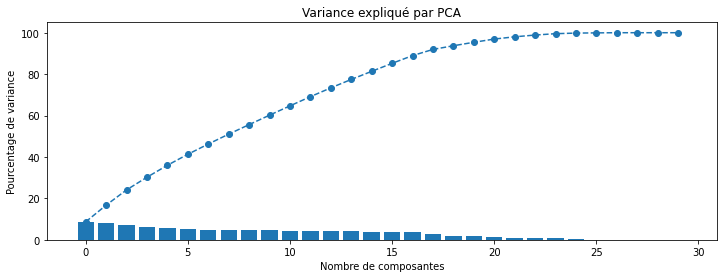

In [ ]:
# Représentation graphique
fig = plt.figure(1, figsize = (12, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)
plt.ylim(0, 1.05*100)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.ylabel('Pourcentage de variance')
plt.xlabel('Nombre de composantes')
plt.title('Variance expliqué par PCA')
plt.show()

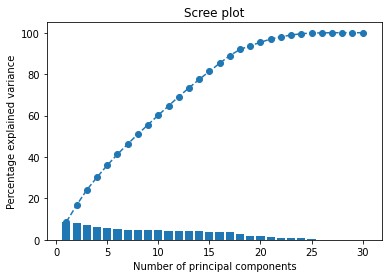

In [ ]:
# Faire un scree plot

def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), marker = 'o', linestyle = '--')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block = False)
    
display_scree_plot(pca)  

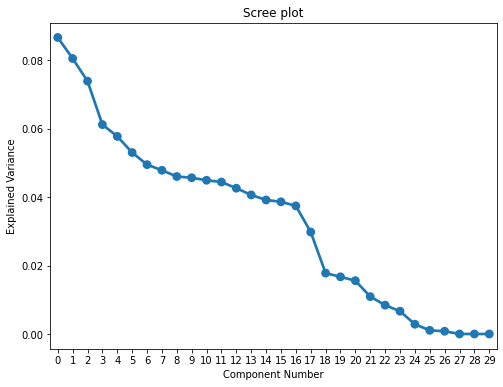

In [ ]:
# Scree plot
# ( = line plot of the eigenvalues of factors or principal components in an analysis)

ind = np.arange(0, df.shape[1])
(fig, ax) = plt.subplots(figsize = (8, 6))
sns.pointplot(x = ind, y = pca.explained_variance_ratio_, marker = 'o', linestyle = '--')
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

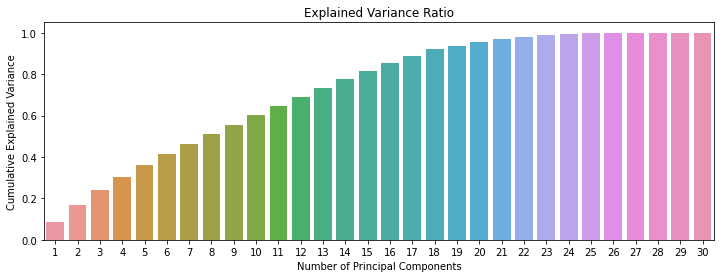

In [ ]:
# autre représentation de la variance expliquée :
plt.figure(figsize = (12, 4))
sns.barplot(x = np.arange(1, len(pca.explained_variance_ratio_) + 1),
            y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([8.66245297e-02, 8.04759613e-02, 7.38732988e-02, 6.11706601e-02,
       5.77221853e-02, 5.30037669e-02, 4.94677781e-02, 4.78177653e-02,
       4.60004531e-02, 4.56389107e-02, 4.49073763e-02, 4.43924156e-02,
       4.25859201e-02, 4.06215377e-02, 3.91457310e-02, 3.86186570e-02,
       3.74168312e-02, 2.97838335e-02, 1.77856888e-02, 1.66911291e-02,
       1.55692888e-02, 1.09154465e-02, 8.42401068e-03, 6.65009364e-03,
       2.84773188e-03, 1.05499267e-03, 7.94006342e-04, 4.87050203e-32,
       4.87176078e-34, 4.87176078e-34])

In [ ]:
# Test en ne gardant que 2 dimensions :

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df)

In [ ]:
print('Explained variance regarding first dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[0]))
print('Explained variance regarding second dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[1]))
print('Total variance included in those 2 dimensions : ' + '{:.1%}'.format(pca.explained_variance_ratio_.sum()))

Explained variance regarding first dimension : 8.7%
Explained variance regarding second dimension : 8.0%
Total variance included in those 2 dimensions : 16.7%


In [ ]:
# Test en conservant 90% de la variance

pca_90 = PCA(n_components = 0.90)  # 90% de la variance
df_pca_90 = pca_90.fit_transform(df)

# Mise sous forme de DataFrame
df_pca_90 = pd.DataFrame(df_pca_90, columns = ['Composante_' + str(i) for i in range(df_pca_90.shape[1])])
df_pca_90.shape

(87099, 18)

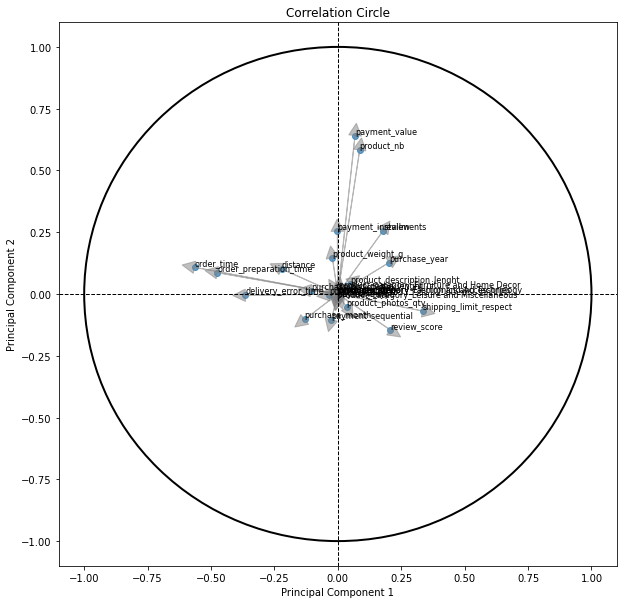

In [ ]:
# Plot the correlation circle

def plot_correlation_circle(pca, features, dimensions = (0, 1), scale_factor = 1):
    num_features = len(features)
    num_principal_components = pca.components_.shape[0]

    if dimensions[0] >= num_principal_components or dimensions[1] >= num_principal_components:
        raise ValueError('Invalid dimensions. Ensure that dimensions are within the range of available principal components.')

    plt.figure(figsize = (10, 10))

    # Scatter plot (avec transparence)
    plt.scatter(pca.components_[dimensions[0], :],
                pca.components_[dimensions[1], :],
                alpha = 0.7)

    # Plot arrows
    for i in range(num_features):
        plt.arrow(0,
                  0,
                  pca.components_[dimensions[0], i],
                  pca.components_[dimensions[1], i],
                  head_width = 0.05,
                  head_length = 0.05,
                  fc = 'grey',
                  ec = 'grey',
                  alpha = 0.5)

        plt.text(pca.components_[dimensions[0], i] * scale_factor,
                 pca.components_[dimensions[1], i] * scale_factor,
                 features[i],
                 ha = 'left',
                 va = 'bottom',
                 fontsize = 8)

    # Add circle patch
    ellipse = Ellipse((0, 0),
                      2,
                      2,
                      edgecolor = 'black',
                      facecolor = 'none',
                      linewidth = 2)
    plt.gca().add_patch(ellipse)

    # Add reference lines
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
    plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)

    # Set axis labels
    plt.xlabel(f'Principal Component {dimensions[0] + 1}')
    plt.ylabel(f'Principal Component {dimensions[1] + 1}')

    # Set plot title
    plt.title('Correlation Circle')

# Plot correlation circle using the first two principal components
plot_correlation_circle(pca_90, features = df.columns, dimensions = (0, 1))

plt.show()

In [ ]:
# Cercle des correlations : 

# cercle de rayon 1
# axe horizontal = composante principale 1
# axe vertical = composante principale 2

# longueur des flèches = représente à quel point la variance de la variable est expliquée dans ce plan factoriel
# angle entre les flèches = indication de si les variables sont corrélées entre elles sur ce plan ou non
# etc : petit angle -> correlation positive dans ce plan
# angle de 90° -> pas de correlation
# angle de 180° -> correlation negative

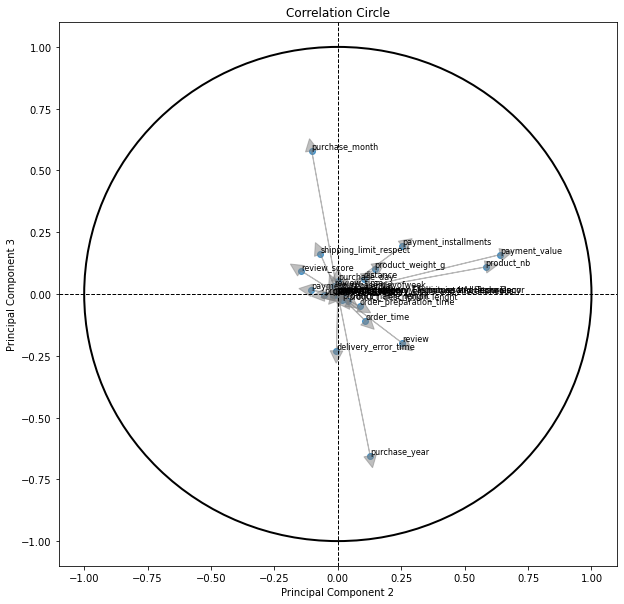

In [ ]:
# autres plans factoriels : 
plot_correlation_circle(pca_90, features = df.columns, dimensions = (1, 2))

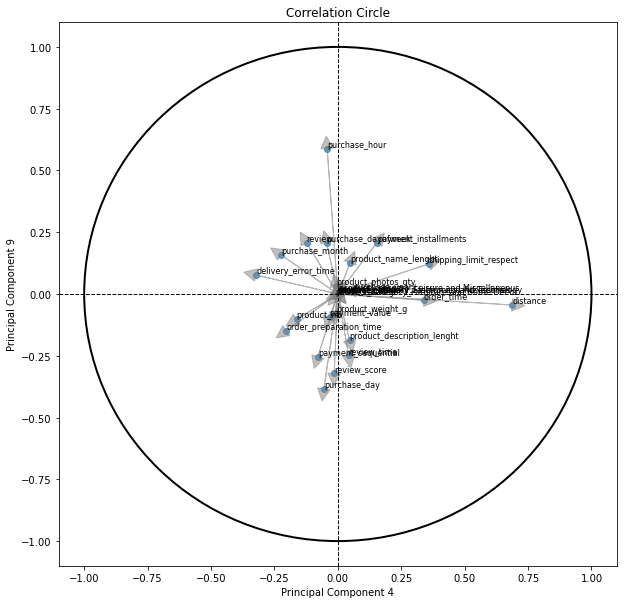

In [ ]:
plot_correlation_circle(pca_90, features = df.columns, dimensions = (3, 8))

In [ ]:
# à tester :
"""
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/

from mlxtend.plotting import plot_pca_correlation_graph

X, y = df_pca

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm,
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

correlation_matrix"""

"\n# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/\n\nfrom mlxtend.plotting import plot_pca_correlation_graph\n\nX, y = df_pca\n\nX_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended\n\nfeature_names = [\n  'sepal length',\n  'sepal width',\n  'petal length',\n  'petal width']\n\nfigure, correlation_matrix = plot_pca_correlation_graph(X_norm,\n                                                        feature_names,\n                                                        dimensions=(1, 2),\n                                                        figure_axis_size=10)\n\ncorrelation_matrix"

In [ ]:
# https://nirpyresearch.com/pca-correlation-circle/
# regarder ça, super interessant

In [ ]:
# étudier les 10 principales composantes

pca = PCA(n_components = 10)
pca.fit(df)
pca.components_

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 
                                    'Component 2', 
                                    'Component 3', 
                                    'Component 4', 
                                    'Component 5', 
                                    'Component 6', 
                                    'Component 7', 
                                    'Component 8', 
                                    'Component 9', 
                                    'Component 10'])
df_pca_comp

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,distance,product_nb,customer_city,customer_state,order_status,payment_type,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
Component 1,-0.01012,0.04795,0.03484,-0.02140,-0.02531,-0.00193,0.06788,0.20674,0.00435,-0.56501,-0.36445,-0.47501,0.33448,0.20215,-0.13042,-0.10631,-0.00061,-0.03360,0.17733,-0.22170,0.08612,0.0,0.0,0.00012,-0.00207,0.00006,-0.00034,0.00031,0.00268,-0.00271
Component 2,0.01683,0.04156,-0.05393,0.14504,-0.10401,0.25348,0.64144,-0.14529,-0.01370,0.10801,-0.00526,0.08642,-0.06881,0.12747,-0.10284,0.01357,0.00008,-0.00371,0.25436,0.10159,0.58254,-0.0,-0.0,0.00047,-0.01539,0.00024,-0.00135,0.00024,0.01919,-0.01832
Component 3,-0.02230,-0.02941,-0.00471,0.10036,0.01491,0.19387,0.15950,0.09408,0.03316,-0.10765,-0.23011,-0.05064,0.16208,-0.65420,0.57921,0.02137,0.05234,-0.00431,-0.19893,0.06036,0.10971,0.0,0.0,0.00026,-0.00359,0.00052,0.00117,0.00074,0.00158,-0.00401
Component 4,0.04854,0.04679,-0.00596,-0.00804,-0.07864,0.15394,-0.03319,-0.01434,0.04294,0.33984,-0.32259,-0.20281,0.35788,0.06241,-0.22404,-0.04435,-0.05491,-0.04227,-0.12300,0.68649,-0.16188,-0.0,-0.0,-0.00039,0.00345,0.00024,0.00105,0.00036,-0.00666,0.00501
Component 5,-0.51813,-0.47209,-0.53106,-0.31832,0.11798,-0.18543,-0.03161,-0.12336,0.03908,0.04793,-0.04048,-0.02716,0.12889,-0.03072,0.01360,-0.02562,-0.00975,-0.02274,0.09870,0.04834,0.15323,0.0,0.0,-0.00027,-0.00323,-0.00094,-0.00112,0.00053,0.00340,-0.00187
Component 6,0.26728,0.14190,0.23798,-0.37074,0.13370,-0.33698,0.00106,-0.31822,-0.03366,0.13328,0.27106,-0.26024,0.21492,-0.08638,0.22139,-0.32054,0.15152,-0.10158,0.20251,0.07455,0.19024,-0.0,-0.0,0.00014,-0.00302,-0.00111,0.00109,-0.00135,0.00742,-0.00605
Component 7,-0.06982,-0.10490,-0.19341,0.37813,-0.15320,0.21628,0.03039,-0.16530,-0.16675,0.07421,0.30167,-0.12973,0.24554,0.00208,-0.11822,-0.50439,0.29566,0.08479,-0.27934,-0.22339,-0.11309,0.0,0.0,-0.00014,0.00236,0.00074,-0.00037,-0.00041,-0.00609,0.00613
Component 8,0.03143,0.00457,0.04050,0.27450,0.66036,-0.17582,0.08007,0.04275,0.24278,0.05110,0.01336,-0.00620,0.10386,-0.01672,-0.11248,-0.16003,-0.35415,0.41557,-0.15141,-0.01645,0.11918,-0.0,-0.0,-0.00025,-0.00427,-0.00002,0.00050,-0.00036,0.00814,-0.00826
Component 9,0.12826,-0.18891,0.03017,-0.07207,-0.24885,0.20875,-0.09754,-0.32251,-0.25397,-0.02296,0.07613,-0.15017,0.12228,0.01052,0.15575,0.20824,-0.38727,0.58421,0.20754,-0.04682,-0.09978,0.0,0.0,-0.00018,0.00420,-0.00035,0.00028,-0.00044,-0.00825,0.00876
Component 10,0.02565,-0.02670,-0.00451,-0.06661,-0.34591,0.08267,-0.02826,-0.04386,0.89804,0.00080,0.09627,-0.03900,-0.01798,-0.00863,0.02970,-0.09892,0.03564,0.15392,0.07844,-0.05579,-0.04845,-0.0,-0.0,-0.00011,0.00364,-0.00018,0.00034,-0.00015,-0.00433,0.00432


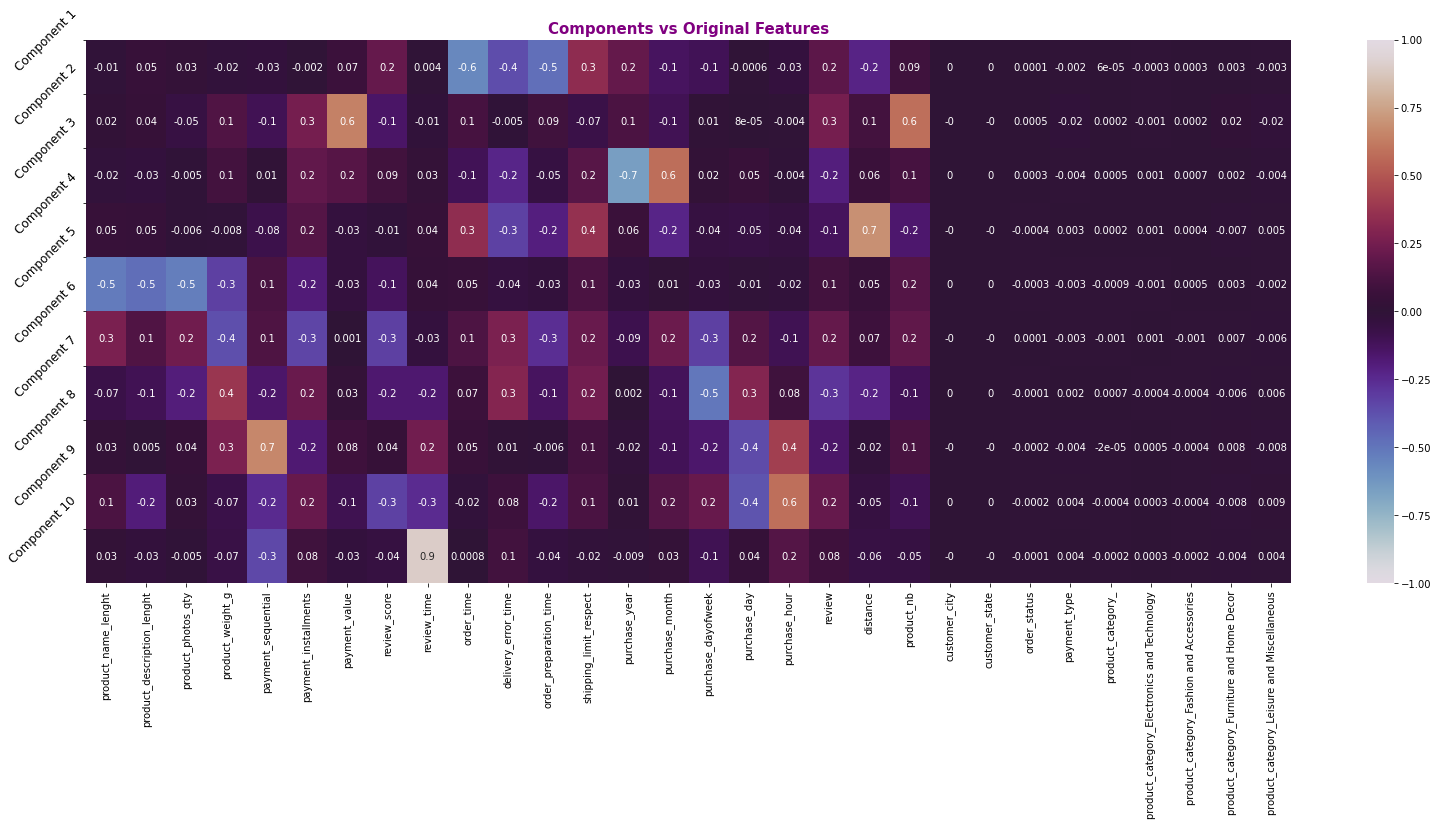

In [ ]:
plt.figure(figsize = (27, 10))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            annot = True, 
            cmap = 'twilight', 
            #square = True, 
            fmt = ".1g",)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9', 'Component 10'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features', fontsize = 15, fontweight = 'bold', color = 'purple')
plt.show()

In [ ]:
# peut être interessant - garder en tête que valeurs neg/pos, composantes n'ont pas le même poids, etc... 
# revoir categories car bizarre que tout soit à zero

In [ ]:
# https://medium.com/@ugursavci/step-by-step-customer-segmentation-using-k-means-and-pca-in-python-5733822295b6

## Export du jeu de données final

In [2073]:
# Export données 'propres' au format pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df, f)